In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('DATASET\diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Eksplorasi Data Analisis

In [3]:
# !. Informasi dasar Dataset
print("=== INFORMASI DASAR DATASET ===")
print(f"Ukuran Dataset: {df.shape}")
print(f"Jumlah Baris: {df.shape[0]}")
print(f"Jumlah Kolom: {df.shape[1]}")
print("\nTipe Data:")
print(df.dtypes)
print("\nInformasi dataset:")
df.info()

=== INFORMASI DASAR DATASET ===
Ukuran Dataset: (768, 9)
Jumlah Baris: 768
Jumlah Kolom: 9

Tipe Data:
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

Informasi dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    flo

In [4]:
# 2. Statistik Deskriptif
print("\n=== STATISTIK DESKRIPTIF ===")
print(df.describe())

#cek nilai unik pada terget variabel
print(f"\nDistribusi target variabel (Outcome):")
print(df['Outcome'].value_counts())
print(f"persentase:")
print(df['Outcome'].value_counts(normalize=True) * 100)


=== STATISTIK DESKRIPTIF ===
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min  

In [5]:
# 3. cek missing values dan nilai anomali
print("\n=== CEK MISSING VALUES DAN NILAI ANOMALI ===")
print("Missing Values per kolom:")
print(df.isnull().sum())

#cek nilai 0 yang mungkin merupakan missing value
print("\nCek nilai 0 pada kolom yang seharusnya tidak boleh 0:")
zero_counts = (df == 0).sum()
print(zero_counts)

#kolom yang secara medis tidak boleh bernilai 0
medical_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
print(f"\nNilai 0 pada kolom medis:")
for col in medical_cols:
    if col in df.columns:
        zero_counts = (df[col] == 0).sum()
        print(f"{col}: {zero_counts}({zero_counts/len(df)*100:.1f}%)")


=== CEK MISSING VALUES DAN NILAI ANOMALI ===
Missing Values per kolom:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Cek nilai 0 pada kolom yang seharusnya tidak boleh 0:
Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

Nilai 0 pada kolom medis:
Glucose: 5(0.7%)
BloodPressure: 35(4.6%)
SkinThickness: 227(29.6%)
Insulin: 374(48.7%)
BMI: 11(1.4%)


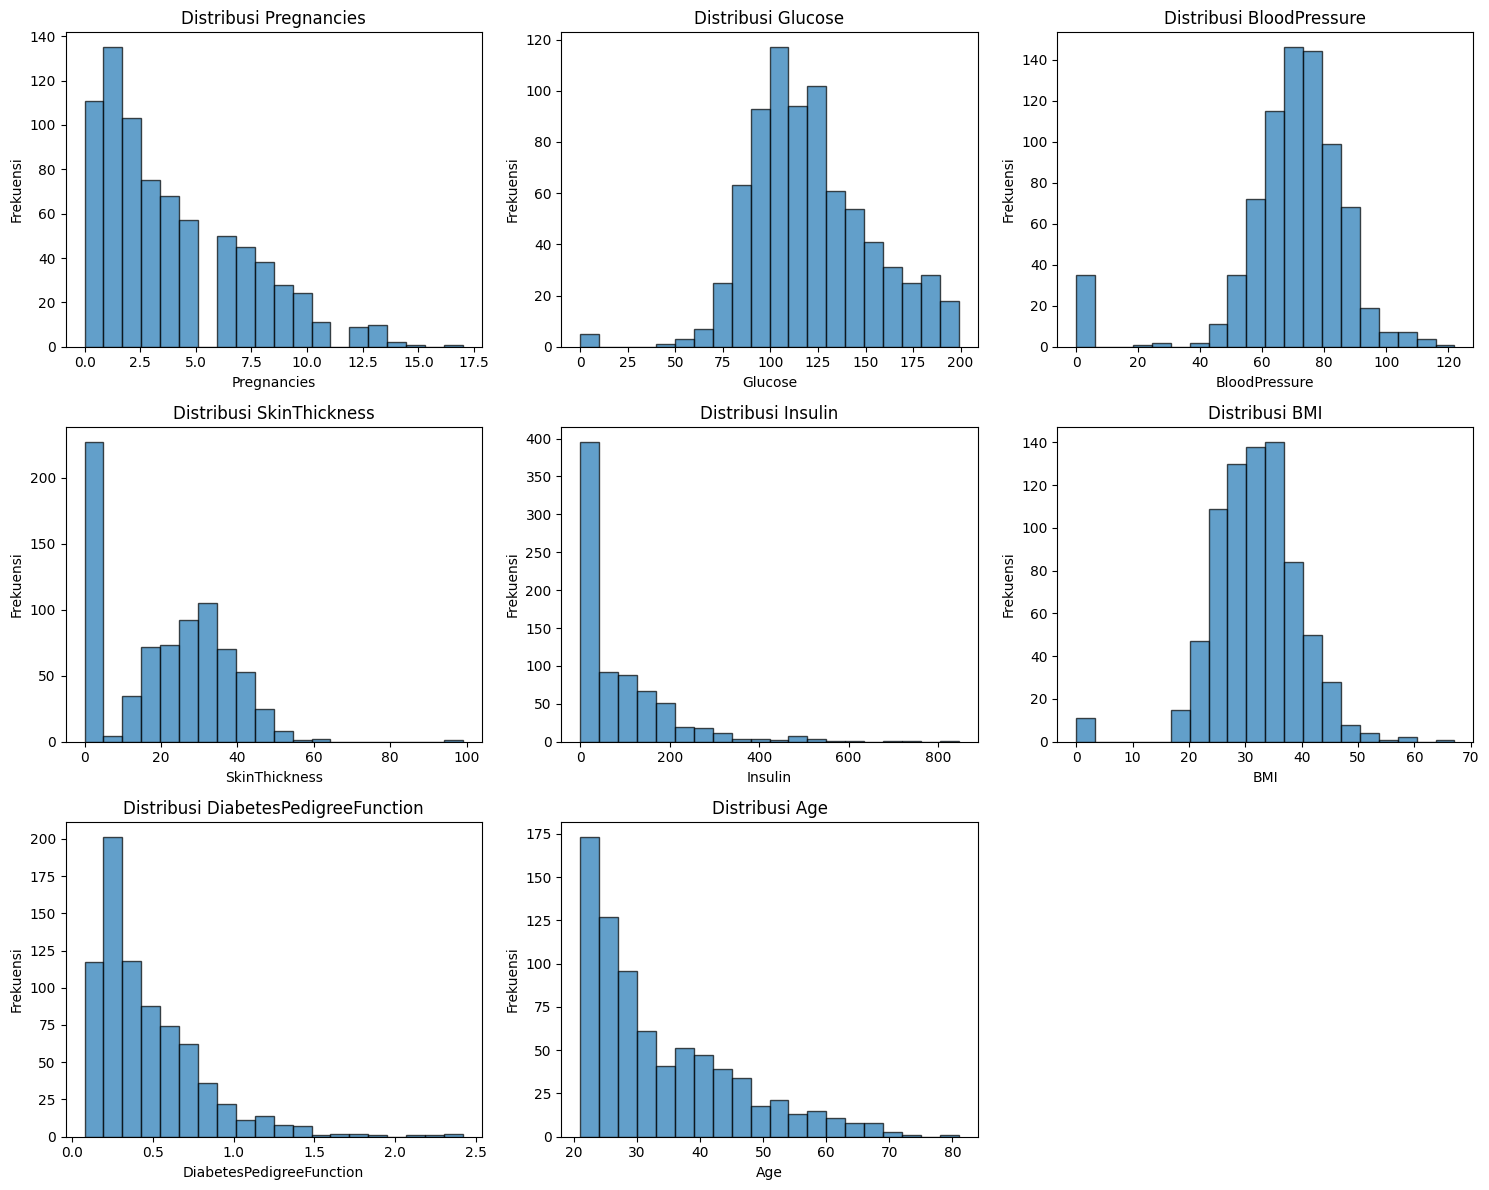

In [6]:
# 4. Visualisasi distribusi data
plt.figure(figsize=(15, 12))

# plot distribusi setiap fitur
for i, column in enumerate(df.columns[:-1], 1):
    plt.subplot(3,3,i)
    plt.hist(df[column], bins= 20, alpha=0.7, edgecolor='black')
    plt.title(f"Distribusi {column}")
    plt.xlabel(column)
    plt.ylabel('Frekuensi')
plt.tight_layout()
plt.show()

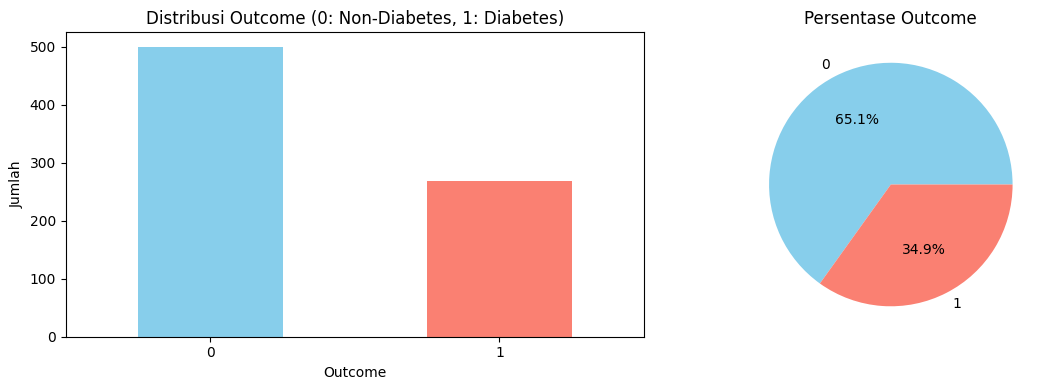

In [7]:
#5. Visualiasasi distribusi target variabel
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
df['Outcome'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribusi Outcome (0: Non-Diabetes, 1: Diabetes)')
plt.ylabel('Jumlah')
plt.xticks(rotation=0)

plt.subplot(1, 2, 2)
df['Outcome'].value_counts().plot(kind = 'pie', autopct='%1.1f%%', colors=['skyblue', 'salmon'])
plt.title('Persentase Outcome')
plt.ylabel('')

plt.tight_layout()
plt.show()


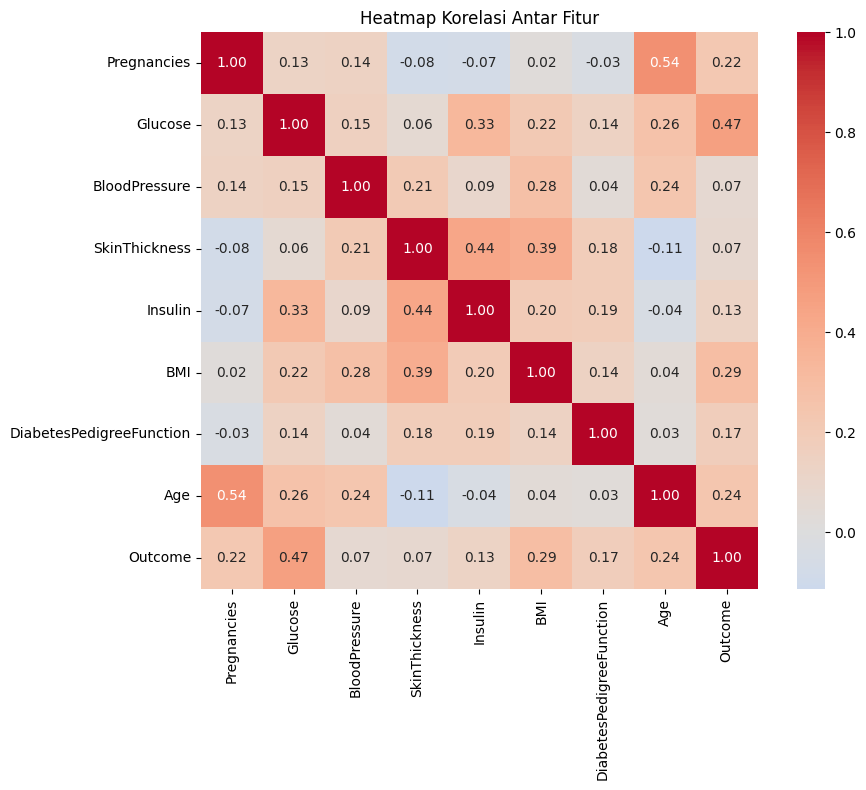


=== KORELASI DENGAN TARGET VARIABEL ===
Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64


In [8]:
# Korelasi antar fitur
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap= 'coolwarm', center=0, square=True, fmt='.2f')
plt.title('Heatmap Korelasi Antar Fitur')
plt.tight_layout()
plt.show()

#Korelasi dengan target variabel
print("\n=== KORELASI DENGAN TARGET VARIABEL ===")
target_corr = df.corr()['Outcome'].sort_values(ascending=False)
print(target_corr)

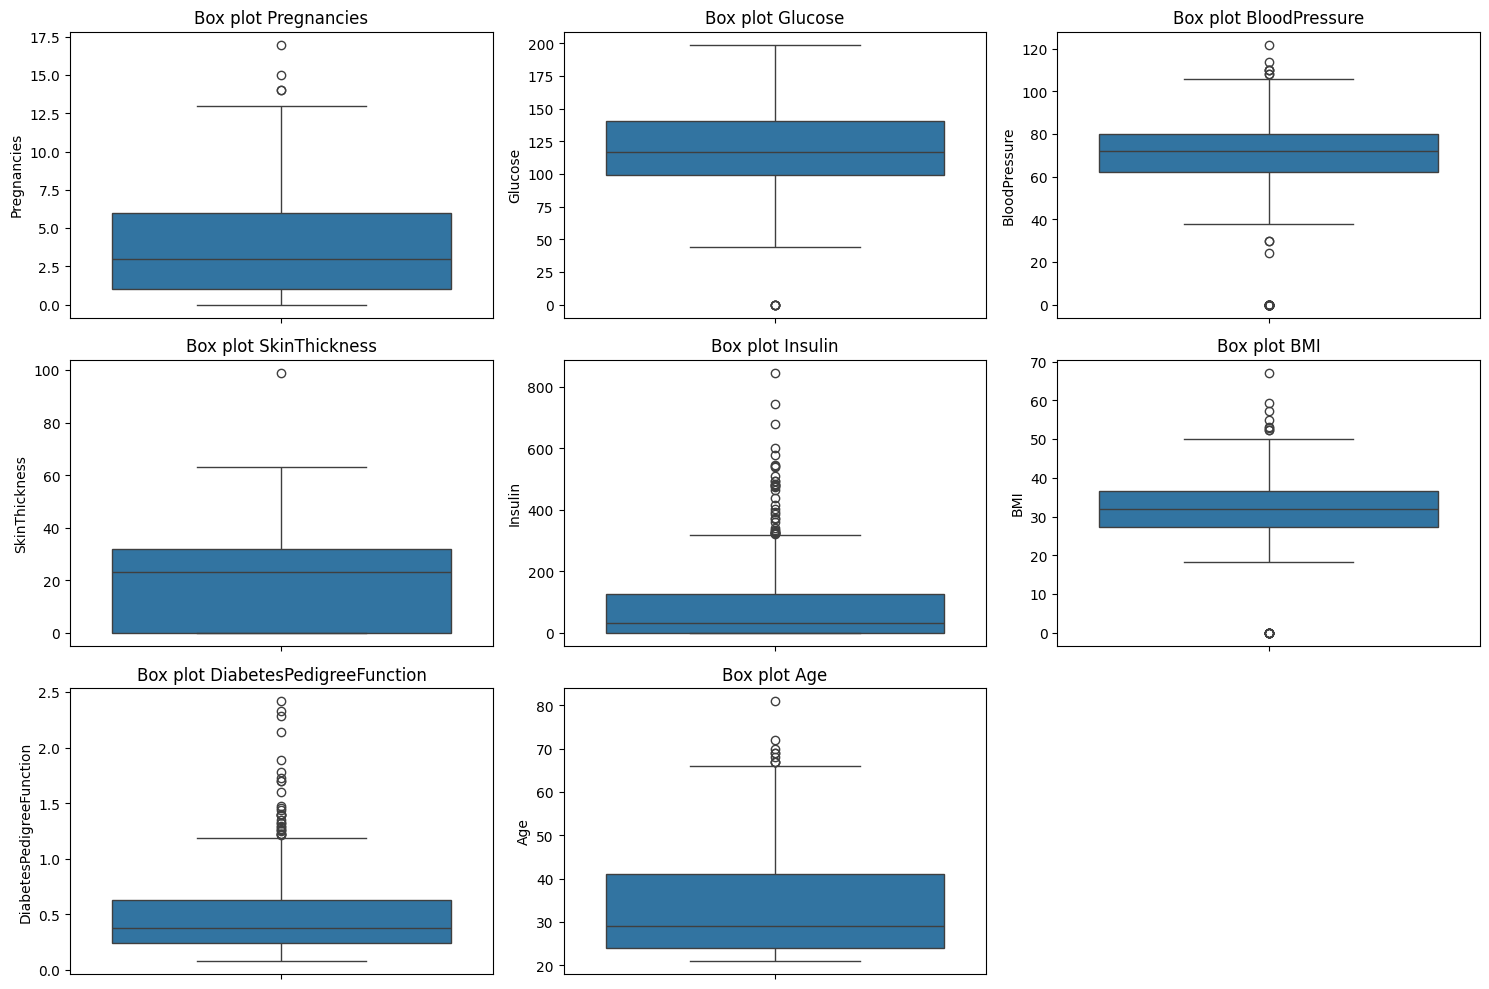

In [9]:
#7. Box plots untuk melihat outliers
plt.figure(figsize=(15, 10))

for i, column in enumerate(df.columns[:-1], 1):
    plt.subplot(3,3,i)
    sns.boxplot(data=df, y=column)
    plt.title(f'Box plot {column}')
plt.tight_layout()
plt.show()

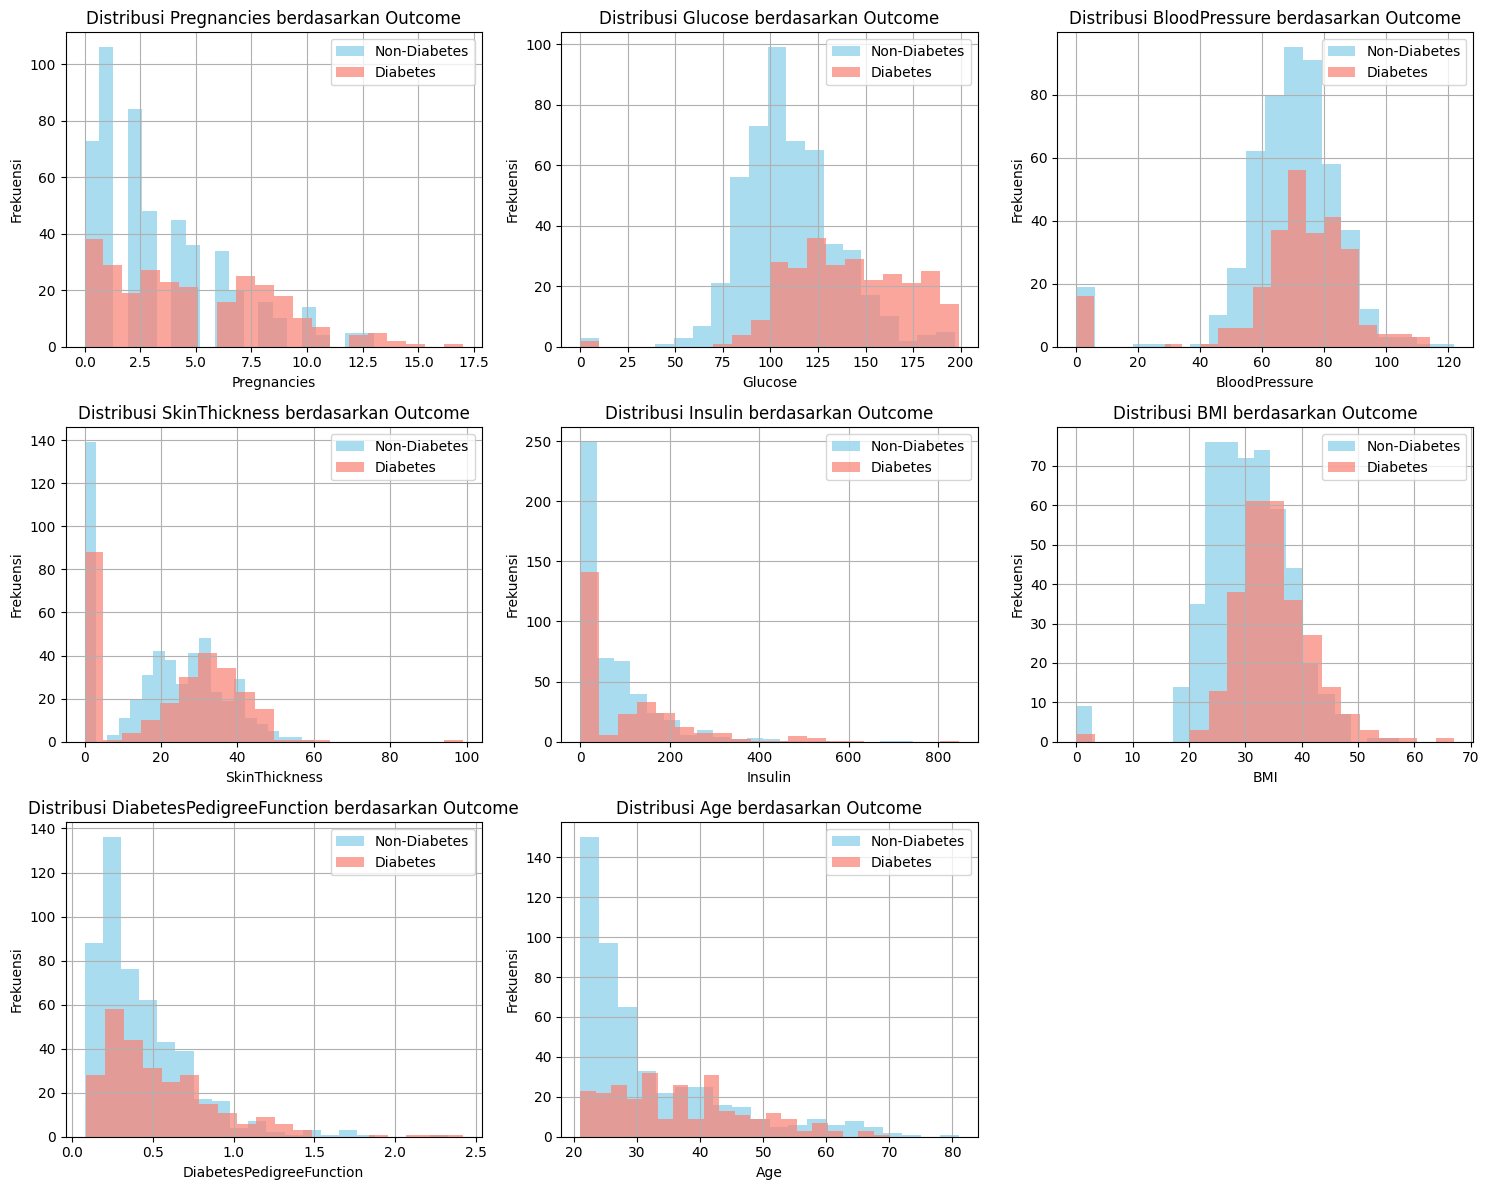

In [10]:
# 8. Perbandingan distribusi berdasarkan outcome
plt.figure(figsize=(15, 12))

for i, column in enumerate(df.columns[:-1], 1):
    plt.subplot(3, 3, i)
    
    # Histogram untuk diabetes dan non-diabetes
    df[df['Outcome'] == 0][column].hist(alpha=0.7, label='Non-Diabetes', bins=20, color='skyblue')
    df[df['Outcome'] == 1][column].hist(alpha=0.7, label='Diabetes', bins=20, color='salmon')
    
    plt.title(f'Distribusi {column} berdasarkan Outcome')
    plt.xlabel(column)
    plt.ylabel('Frekuensi')
    plt.legend()

plt.tight_layout()
plt.show()

In [11]:
# 9. Statistik berdasarkan outcome
print("=== STATISTIK BERDASARKAN OUTCOME ===")
print("Non-Diabetes (Outcome = 0):")
print(df[df['Outcome'] == 0].describe())
print("\nDiabetes (Outcome = 1):")
print(df[df['Outcome'] == 1].describe())

# Perbedaan rata-rata
print("\n=== PERBEDAAN RATA-RATA ===")
means_comparison = df.groupby('Outcome').mean()
print(means_comparison)

=== STATISTIK BERDASARKAN OUTCOME ===
Non-Diabetes (Outcome = 0):
       Pregnancies   Glucose  BloodPressure  SkinThickness     Insulin  \
count   500.000000  500.0000     500.000000     500.000000  500.000000   
mean      3.298000  109.9800      68.184000      19.664000   68.792000   
std       3.017185   26.1412      18.063075      14.889947   98.865289   
min       0.000000    0.0000       0.000000       0.000000    0.000000   
25%       1.000000   93.0000      62.000000       0.000000    0.000000   
50%       2.000000  107.0000      70.000000      21.000000   39.000000   
75%       5.000000  125.0000      78.000000      31.000000  105.000000   
max      13.000000  197.0000     122.000000      60.000000  744.000000   

              BMI  DiabetesPedigreeFunction         Age  Outcome  
count  500.000000                500.000000  500.000000    500.0  
mean    30.304200                  0.429734   31.190000      0.0  
std      7.689855                  0.299085   11.667655      0.0  

In [12]:
# 10. Identifikasi outliers menggunakan IQR
def identify_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return len(outliers)

print("=== JUMLAH OUTLIERS PER KOLOM (METODE IQR) ===")
for column in df.columns[:-1]:
    outlier_count = identify_outliers(df, column)
    print(f"{column}: {outlier_count} outliers ({outlier_count/len(df)*100:.1f}%)")

=== JUMLAH OUTLIERS PER KOLOM (METODE IQR) ===
Pregnancies: 4 outliers (0.5%)
Glucose: 5 outliers (0.7%)
BloodPressure: 45 outliers (5.9%)
SkinThickness: 1 outliers (0.1%)
Insulin: 34 outliers (4.4%)
BMI: 19 outliers (2.5%)
DiabetesPedigreeFunction: 29 outliers (3.8%)
Age: 9 outliers (1.2%)


# Data Cleaning

In [13]:
#1. analisis nilai 0 pada kolom medis
print("\n=== ANALISIS NILAI 0 PADA KOLOM MEDIS ===")
medical_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for col in medical_cols:
    zero_count = (df[col] == 0).sum()
    zero_percentage = zero_count / len(df) * 100
    print(f"{col}: {zero_count} nilai 0 ({zero_percentage:.1f}%)")
 
df_knn = df.copy()

# Replace nilai 0 dengan NaN untuk kolom yang secara medis tidak mungkin 0
# Kecuali Insulin yang bisa valid bernilai 0
cols_to_impute = ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI', 'Insulin']

print(f"\n=== CONVERTING 0 TO NaN FOR IMPUTATION ===")
for col in cols_to_impute:
    zero_count = (df_knn[col] == 0).sum()
    df_knn[col] = df_knn[col].replace(0, np.nan)
    print(f"{col}: {zero_count} nilai 0 dikonversi menjadi NaN")

# Cek missing values setelah konversi
print(f"\nMissing values setelah konversi:")
print(df_knn.isnull().sum())


=== ANALISIS NILAI 0 PADA KOLOM MEDIS ===
Glucose: 5 nilai 0 (0.7%)
BloodPressure: 35 nilai 0 (4.6%)
SkinThickness: 227 nilai 0 (29.6%)
Insulin: 374 nilai 0 (48.7%)
BMI: 11 nilai 0 (1.4%)

=== CONVERTING 0 TO NaN FOR IMPUTATION ===
Glucose: 5 nilai 0 dikonversi menjadi NaN
BloodPressure: 35 nilai 0 dikonversi menjadi NaN
SkinThickness: 227 nilai 0 dikonversi menjadi NaN
BMI: 11 nilai 0 dikonversi menjadi NaN
Insulin: 374 nilai 0 dikonversi menjadi NaN

Missing values setelah konversi:
Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [14]:
# Data Cleaning menggunakan KNN Imputation
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
# 3. KNN Imputation
print("\n=== KNN IMPUTATION PROCESS ===")

# Pisahkan fitur numerik dan target
X = df_knn.drop('Outcome', axis=1)
y = df_knn['Outcome']

# Standardize data sebelum KNN imputation (optional tapi disarankan)
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns, index=X.index)

# Terapkan KNN Imputation dengan berbagai nilai k
k_values = [3, 5, 7]
imputed_results = {}

for k in k_values:
    print(f"\nMenjalankan KNN Imputation dengan k={k}...")
    
    # Initialize KNN Imputer
    knn_imputer = KNNImputer(n_neighbors=k, weights='uniform')
    
    # Fit and transform
    X_imputed_scaled = knn_imputer.fit_transform(X_scaled)
    
    # Convert back to DataFrame
    X_imputed_scaled_df = pd.DataFrame(X_imputed_scaled, columns=X.columns, index=X.index)
    
    # Inverse transform untuk kembali ke skala asli
    X_imputed = pd.DataFrame(scaler.inverse_transform(X_imputed_scaled_df), 
                            columns=X.columns, index=X.index)
    
    # Gabungkan dengan target
    df_imputed = pd.concat([X_imputed, y], axis=1)
    
    # Simpan hasil
    imputed_results[k] = df_imputed.copy()
    
    # Tampilkan statistik
    print(f"Missing values setelah imputation: {df_imputed.isnull().sum().sum()}")

print("KNN Imputation selesai untuk semua nilai k")


=== KNN IMPUTATION PROCESS ===

Menjalankan KNN Imputation dengan k=3...
Missing values setelah imputation: 0

Menjalankan KNN Imputation dengan k=5...
Missing values setelah imputation: 0

Menjalankan KNN Imputation dengan k=7...
Missing values setelah imputation: 0
KNN Imputation selesai untuk semua nilai k


In [15]:
# 4. Evaluasi hasil imputation
print("\n=== EVALUASI HASIL KNN IMPUTATION ===")

# Pilih k=5 sebagai default (balance antara smoothing dan local pattern)
df_knn_final = imputed_results[5].copy()

# Bandingkan statistik sebelum dan sesudah imputation
print("Perbandingan Statistik (Mean ± Std):")
print("="*60)
print(f"{'Column':<15} {'Original':<20} {'After KNN (k=5)':<20}")
print("="*60)

for col in cols_to_impute:
    original_mean = df[df[col] != 0][col].mean()
    original_std = df[df[col] != 0][col].std()
    
    imputed_mean = df_knn_final[col].mean()
    imputed_std = df_knn_final[col].std()
    
    print(f"{col:<15} {original_mean:.1f} ± {original_std:.1f} {'':<8} {imputed_mean:.1f} ± {imputed_std:.1f}")

# Cek apakah ada nilai negatif atau tidak masuk akal setelah imputation
print(f"\n=== VALIDASI HASIL IMPUTATION ===")
for col in cols_to_impute:
    min_val = df_knn_final[col].min()
    max_val = df_knn_final[col].max()
    negative_count = (df_knn_final[col] < 0).sum()
    
    print(f"{col}: Range [{min_val:.1f}, {max_val:.1f}], Negative values: {negative_count}")


=== EVALUASI HASIL KNN IMPUTATION ===
Perbandingan Statistik (Mean ± Std):
Column          Original             After KNN (k=5)     
Glucose         121.7 ± 30.5          121.6 ± 30.5
BloodPressure   72.4 ± 12.4          72.4 ± 12.2
SkinThickness   29.2 ± 10.5          29.0 ± 9.5
BMI             32.5 ± 6.9          32.4 ± 6.9
Insulin         155.5 ± 118.8          153.7 ± 97.8

=== VALIDASI HASIL IMPUTATION ===
Glucose: Range [44.0, 199.0], Negative values: 0
BloodPressure: Range [24.0, 122.0], Negative values: 0
SkinThickness: Range [7.0, 99.0], Negative values: 0
BMI: Range [18.2, 67.1], Negative values: 0
Insulin: Range [14.0, 846.0], Negative values: 0


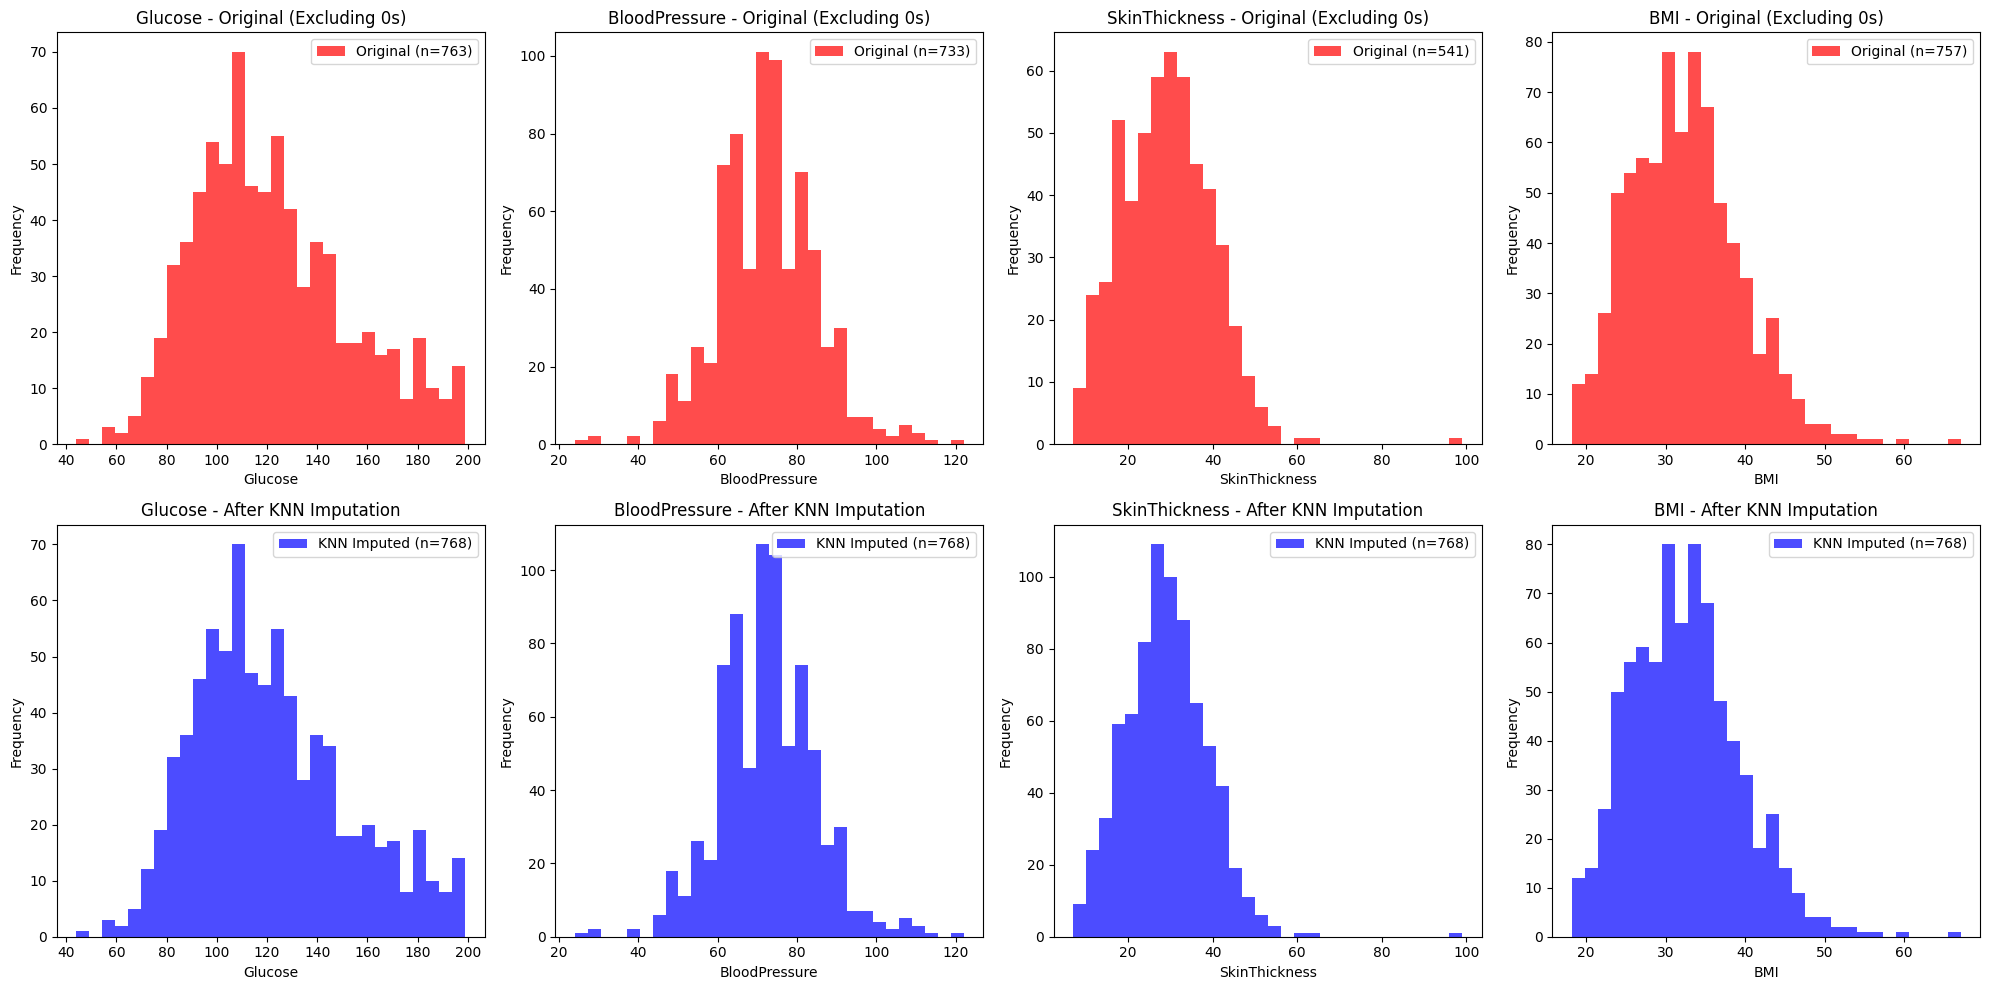

In [16]:
# 5. Visualisasi perbandingan distribusi
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
cols_to_plot = ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI']

for i, col in enumerate(cols_to_plot):
    # Original data (exclude 0 values)
    original_data = df[df[col] != 0][col]
    axes[0, i].hist(original_data, bins=30, alpha=0.7, color='red', 
                   label=f'Original (n={len(original_data)})')
    axes[0, i].set_title(f'{col} - Original (Excluding 0s)')
    axes[0, i].set_xlabel(col)
    axes[0, i].set_ylabel('Frequency')
    axes[0, i].legend()
    
    # After KNN imputation
    axes[1, i].hist(df_knn_final[col], bins=30, alpha=0.7, color='blue', 
                   label=f'KNN Imputed (n={len(df_knn_final)})')
    axes[1, i].set_title(f'{col} - After KNN Imputation')
    axes[1, i].set_xlabel(col)
    axes[1, i].set_ylabel('Frequency')
    axes[1, i].legend()

plt.tight_layout()
plt.show()

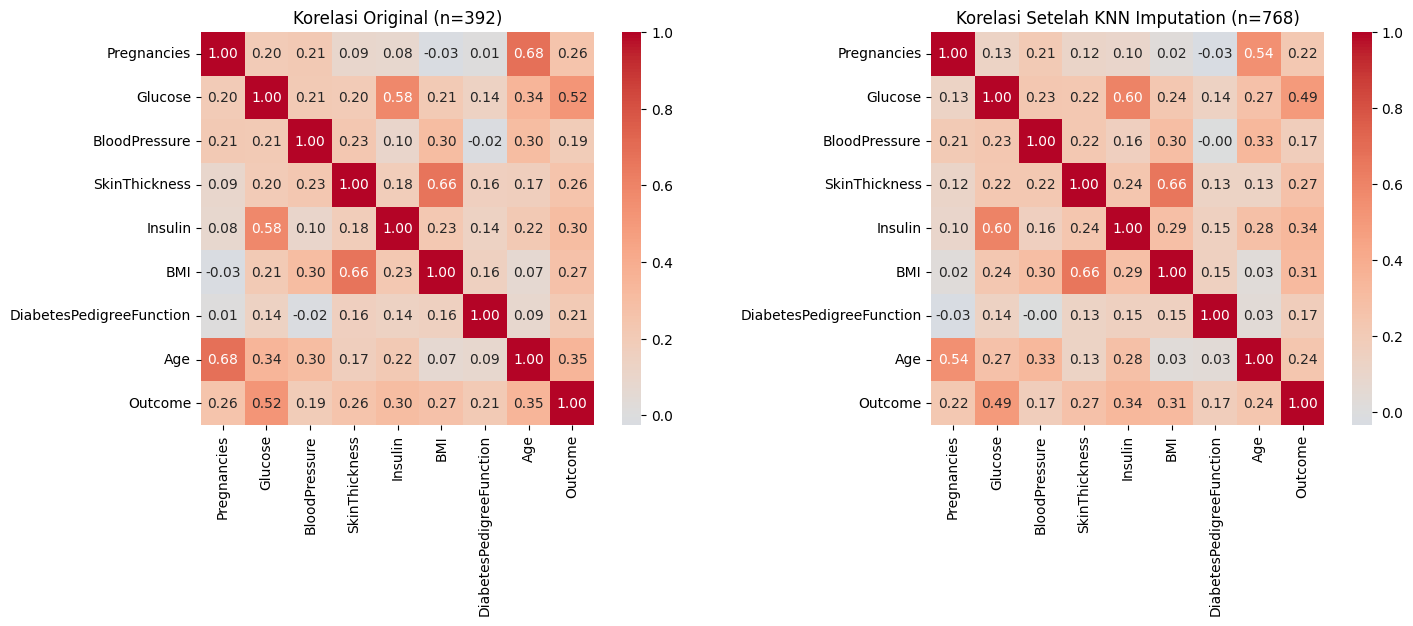


=== PERBANDINGAN KORELASI DENGAN TARGET ===
Feature              Original   KNN Imputed  Difference
Pregnancies             0.257      0.222   -0.035
Glucose                 0.516      0.494   -0.021
BloodPressure           0.193      0.173   -0.020
SkinThickness           0.256      0.269   +0.013
Insulin                 0.301      0.336   +0.035
BMI                     0.270      0.315   +0.045
DiabetesPedigreeFunction    0.209      0.174   -0.035
Age                     0.351      0.238   -0.112


In [17]:
# 6. Bandingkan korelasi sebelum dan sesudah imputation
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Korelasi original (exclude rows dengan 0)
mask_complete = True
for col in cols_to_impute:
    mask_complete = mask_complete & (df[col] != 0)

df_original_complete = df[mask_complete]

# Heatmap original
corr_original = df_original_complete.corr()
sns.heatmap(corr_original, annot=True, cmap='coolwarm', center=0, 
            square=True, fmt='.2f', ax=axes[0])
axes[0].set_title(f'Korelasi Original (n={len(df_original_complete)})')

# Heatmap setelah KNN imputation
corr_imputed = df_knn_final.corr()
sns.heatmap(corr_imputed, annot=True, cmap='coolwarm', center=0, 
            square=True, fmt='.2f', ax=axes[1])
axes[1].set_title(f'Korelasi Setelah KNN Imputation (n={len(df_knn_final)})')

plt.tight_layout()
plt.show()

# Tampilkan perbedaan korelasi dengan target
print("\n=== PERBANDINGAN KORELASI DENGAN TARGET ===")
print(f"{'Feature':<20} {'Original':<10} {'KNN Imputed':<12} {'Difference':<10}")
print("="*60)

for col in df.columns[:-1]:
    corr_orig = corr_original.loc[col, 'Outcome']
    corr_imp = corr_imputed.loc[col, 'Outcome']
    diff = corr_imp - corr_orig
    
    print(f"{col:<20} {corr_orig:>8.3f} {corr_imp:>10.3f} {diff:>+8.3f}")

In [18]:
# 7. Menangani outliers setelah KNN imputation
print("\n=== MENANGANI OUTLIERS SETELAH KNN IMPUTATION ===")

def remove_outliers_iqr(data, column, factor=1.5):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - factor * IQR
    upper_bound = Q3 + factor * IQR
    
    outliers_mask = (data[column] < lower_bound) | (data[column] > upper_bound)
    return outliers_mask, outliers_mask.sum()

# Identifikasi outliers
print("Outliers per kolom setelah KNN imputation:")
outlier_masks = {}
total_outlier_rows = np.zeros(len(df_knn_final), dtype=bool)

for col in df_knn_final.columns[:-1]:
    mask, count = remove_outliers_iqr(df_knn_final, col)
    outlier_masks[col] = mask
    total_outlier_rows = total_outlier_rows | mask
    print(f"{col}: {count} outliers ({count/len(df_knn_final)*100:.1f}%)")

print(f"\nTotal baris dengan outliers: {total_outlier_rows.sum()} ({total_outlier_rows.sum()/len(df_knn_final)*100:.1f}%)")

# Dataset final setelah menghapus outliers
df_final = df_knn_final[~total_outlier_rows].copy()

print(f"\n=== SUMMARY FINAL DATASET ===")
print(f"Original dataset: {df.shape[0]} baris")
print(f"Setelah KNN imputation: {df_knn_final.shape[0]} baris")
print(f"Setelah menghapus outliers: {df_final.shape[0]} baris")
print(f"Data yang dihapus total: {df.shape[0] - df_final.shape[0]} baris ({(df.shape[0] - df_final.shape[0])/df.shape[0]*100:.1f}%)")

print(f"\nDistribusi target pada dataset final:")
print(df_final['Outcome'].value_counts(normalize=True) * 100)


=== MENANGANI OUTLIERS SETELAH KNN IMPUTATION ===
Outliers per kolom setelah KNN imputation:
Pregnancies: 4 outliers (0.5%)
Glucose: 0 outliers (0.0%)
BloodPressure: 14 outliers (1.8%)
SkinThickness: 6 outliers (0.8%)
Insulin: 28 outliers (3.6%)
BMI: 8 outliers (1.0%)
DiabetesPedigreeFunction: 29 outliers (3.8%)
Age: 9 outliers (1.2%)

Total baris dengan outliers: 88 (11.5%)

=== SUMMARY FINAL DATASET ===
Original dataset: 768 baris
Setelah KNN imputation: 768 baris
Setelah menghapus outliers: 680 baris
Data yang dihapus total: 88 baris (11.5%)

Distribusi target pada dataset final:
Outcome
0    67.5
1    32.5
Name: proportion, dtype: float64


# Preprocessing

In [19]:
# LANGKAH YANG DIPERBAIKI: Split Data Dulu, Baru SMOTE dan Scaling
print("=== LANGKAH YANG DIPERBAIKI: SPLIT → SMOTE → SCALING ===")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from collections import Counter

# 1. SPLIT DATA TERLEBIH DAHULU (tanpa SMOTE)
print("\n=== STEP 1: SPLIT DATA ORIGINAL ===")

# Gunakan dataset final yang sudah dibersihkan (df_final)
X_original = df_final.drop('Outcome', axis=1)
y_original = df_final['Outcome']

print(f"Dataset original sebelum split:")
print(f"X shape: {X_original.shape}")
print(f"y distribution: {Counter(y_original)}")

# Split menjadi train dan test (70:30)
X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(
    X_original, y_original, 
    test_size=0.3, 
    random_state=42, 
    stratify=y_original
)

print(f"\nSetelah split:")
print(f"X_train_raw: {X_train_raw.shape}")
print(f"X_test_raw: {X_test_raw.shape}")
print(f"y_train_raw distribution: {Counter(y_train_raw)}")
print(f"y_test_raw distribution: {Counter(y_test_raw)}")

# Cek proporsi
train_diabetes_pct = (y_train_raw == 1).sum() / len(y_train_raw) * 100
test_diabetes_pct = (y_test_raw == 1).sum() / len(y_test_raw) * 100
print(f"Training set - Diabetes: {train_diabetes_pct:.1f}%")
print(f"Test set - Diabetes: {test_diabetes_pct:.1f}%")

=== LANGKAH YANG DIPERBAIKI: SPLIT → SMOTE → SCALING ===



=== STEP 1: SPLIT DATA ORIGINAL ===
Dataset original sebelum split:
X shape: (680, 8)
y distribution: Counter({0: 459, 1: 221})

Setelah split:
X_train_raw: (476, 8)
X_test_raw: (204, 8)
y_train_raw distribution: Counter({0: 321, 1: 155})
y_test_raw distribution: Counter({0: 138, 1: 66})
Training set - Diabetes: 32.6%
Test set - Diabetes: 32.4%


In [20]:
# 2. FEATURE SCALING PADA TRAINING SET (FIT) dan TEST SET (TRANSFORM)
print("\n=== STEP 2: FEATURE SCALING ===")

# Initialize scaler dan fit HANYA pada training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_raw)
X_test_scaled = scaler.transform(X_test_raw)  # Hanya transform, tidak fit!

print(f"Feature scaling completed:")
print(f"X_train_scaled shape: {X_train_scaled.shape}")
print(f"X_test_scaled shape: {X_test_scaled.shape}")

# Cek distribusi setelah scaling
print(f"\nSetelah StandardScaler (Training data):")
print(f"Mean: {X_train_scaled.mean(axis=0).round(3)}")
print(f"Std: {X_train_scaled.std(axis=0).round(3)}")

print(f"\nSetelah StandardScaler (Test data):")
print(f"Mean: {X_test_scaled.mean(axis=0).round(3)}")
print(f"Std: {X_test_scaled.std(axis=0).round(3)}")

# Convert ke DataFrame untuk kemudahan
feature_names = X_original.columns
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=feature_names)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=feature_names)


=== STEP 2: FEATURE SCALING ===
Feature scaling completed:
X_train_scaled shape: (476, 8)
X_test_scaled shape: (204, 8)

Setelah StandardScaler (Training data):
Mean: [-0. -0. -0. -0. -0.  0.  0. -0.]
Std: [1. 1. 1. 1. 1. 1. 1. 1.]

Setelah StandardScaler (Test data):
Mean: [-0.046  0.024  0.104 -0.034  0.068 -0.035  0.07   0.103]
Std: [0.946 0.986 1.026 1.038 1.003 1.048 1.046 1.11 ]


In [21]:
# 3. SMOTE OVERSAMPLING HANYA PADA TRAINING SET
print("\n=== STEP 3: SMOTE OVERSAMPLING (TRAINING SET ONLY) ===")

print(f"Sebelum SMOTE:")
print(f"Training set distribution: {Counter(y_train_raw)}")
print(f"Training set size: {len(y_train_raw)}")

# Terapkan SMOTE HANYA pada training set
smote = SMOTE(random_state=42, sampling_strategy='auto')
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train_raw)

print(f"\nSetelah SMOTE:")
print(f"Training set distribution: {Counter(y_train_smote)}")
print(f"Training set size: {len(y_train_smote)}")

# Hitung penambahan sampel
original_train_size = len(y_train_raw)
smote_train_size = len(y_train_smote)
added_samples = smote_train_size - original_train_size

print(f"\nSampel yang ditambahkan SMOTE: {added_samples}")
print(f"Peningkatan data training: {(added_samples/original_train_size)*100:.1f}%")

# PENTING: Test set TIDAK diubah!
print(f"\nTest set tetap original (tidak ada SMOTE):")
print(f"Test set distribution: {Counter(y_test_raw)}")
print(f"Test set size: {len(y_test_raw)}")


=== STEP 3: SMOTE OVERSAMPLING (TRAINING SET ONLY) ===
Sebelum SMOTE:
Training set distribution: Counter({0: 321, 1: 155})
Training set size: 476

Setelah SMOTE:
Training set distribution: Counter({0: 321, 1: 321})
Training set size: 642

Sampel yang ditambahkan SMOTE: 166
Peningkatan data training: 34.9%

Test set tetap original (tidak ada SMOTE):
Test set distribution: Counter({0: 138, 1: 66})
Test set size: 204



=== STEP 4: VISUALISASI PERBANDINGAN ===


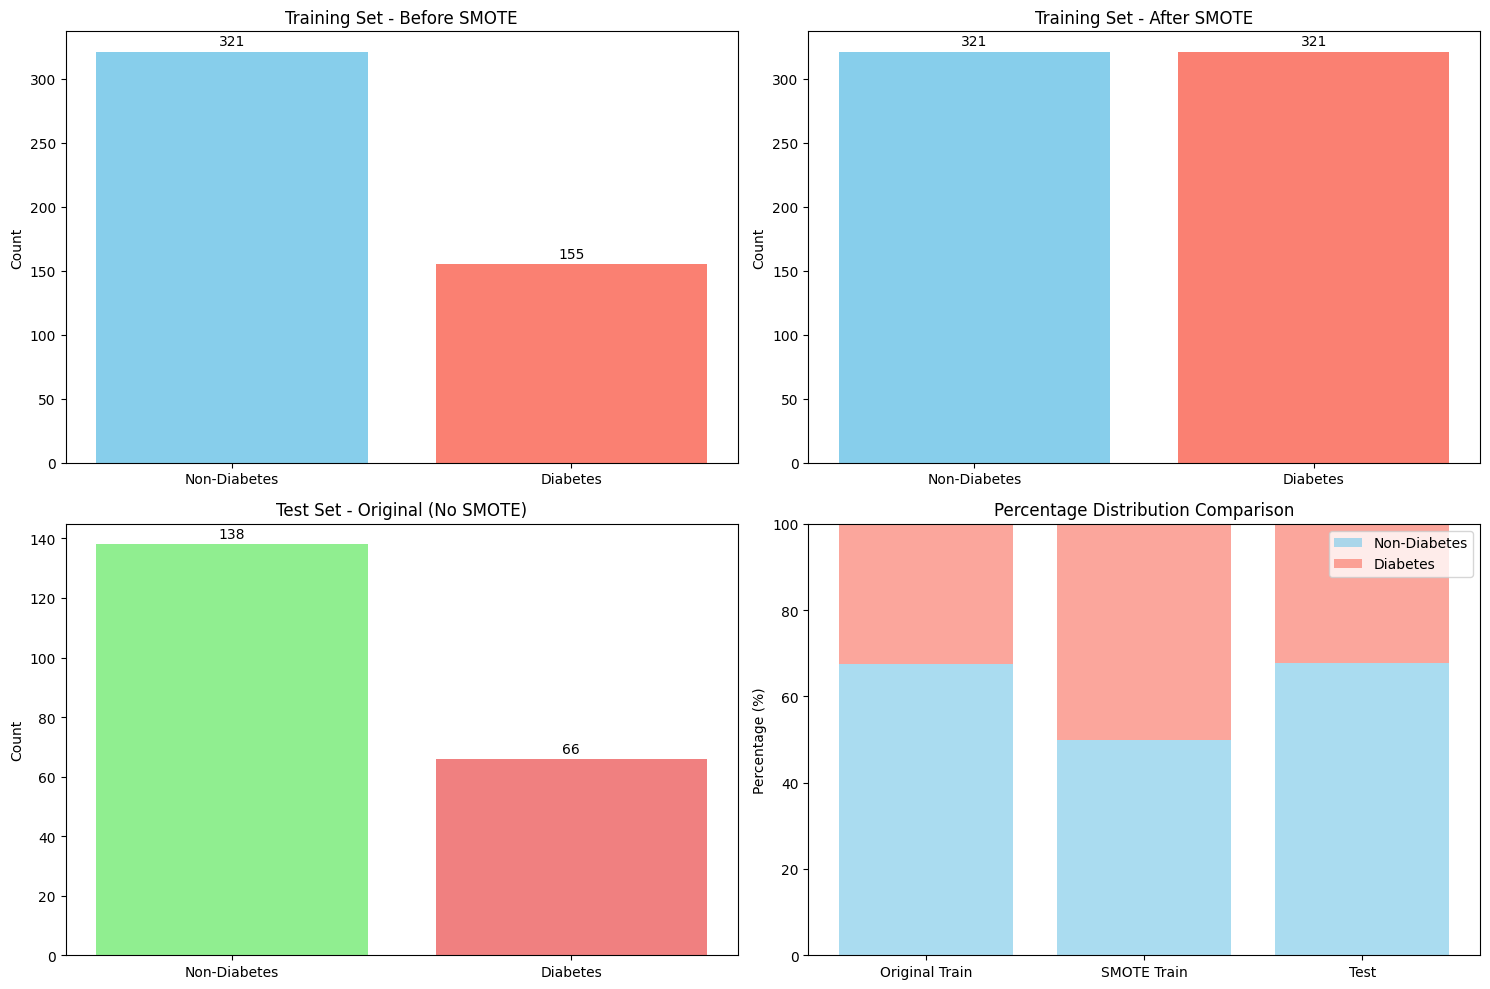

In [22]:
# 4. VISUALISASI PERBANDINGAN DISTRIBUSI
print("\n=== STEP 4: VISUALISASI PERBANDINGAN ===")

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Original training distribution
axes[0,0].bar(['Non-Diabetes', 'Diabetes'], 
              [Counter(y_train_raw)[0], Counter(y_train_raw)[1]], 
              color=['skyblue', 'salmon'])
axes[0,0].set_title('Training Set - Before SMOTE')
axes[0,0].set_ylabel('Count')
for i, v in enumerate([Counter(y_train_raw)[0], Counter(y_train_raw)[1]]):
    axes[0,0].text(i, v + 5, str(v), ha='center')

# Training after SMOTE
axes[0,1].bar(['Non-Diabetes', 'Diabetes'], 
              [Counter(y_train_smote)[0], Counter(y_train_smote)[1]], 
              color=['skyblue', 'salmon'])
axes[0,1].set_title('Training Set - After SMOTE')
axes[0,1].set_ylabel('Count')
for i, v in enumerate([Counter(y_train_smote)[0], Counter(y_train_smote)[1]]):
    axes[0,1].text(i, v + 5, str(v), ha='center')

# Test set (unchanged)
axes[1,0].bar(['Non-Diabetes', 'Diabetes'], 
              [Counter(y_test_raw)[0], Counter(y_test_raw)[1]], 
              color=['lightgreen', 'lightcoral'])
axes[1,0].set_title('Test Set - Original (No SMOTE)')
axes[1,0].set_ylabel('Count')
for i, v in enumerate([Counter(y_test_raw)[0], Counter(y_test_raw)[1]]):
    axes[1,0].text(i, v + 2, str(v), ha='center')

# Comparison percentages
train_orig_pct = [Counter(y_train_raw)[0]/len(y_train_raw)*100, 
                  Counter(y_train_raw)[1]/len(y_train_raw)*100]
train_smote_pct = [Counter(y_train_smote)[0]/len(y_train_smote)*100, 
                   Counter(y_train_smote)[1]/len(y_train_smote)*100]
test_pct = [Counter(y_test_raw)[0]/len(y_test_raw)*100, 
            Counter(y_test_raw)[1]/len(y_test_raw)*100]

x = ['Original Train', 'SMOTE Train', 'Test']
non_diabetes_pct = [train_orig_pct[0], train_smote_pct[0], test_pct[0]]
diabetes_pct = [train_orig_pct[1], train_smote_pct[1], test_pct[1]]

axes[1,1].bar(x, non_diabetes_pct, label='Non-Diabetes', color='skyblue', alpha=0.7)
axes[1,1].bar(x, diabetes_pct, bottom=non_diabetes_pct, label='Diabetes', color='salmon', alpha=0.7)
axes[1,1].set_title('Percentage Distribution Comparison')
axes[1,1].set_ylabel('Percentage (%)')
axes[1,1].legend()
axes[1,1].set_ylim(0, 100)

plt.tight_layout()
plt.show()

In [23]:
# 5. VALIDASI KUALITAS DATA SETELAH PROSES
print("\n=== STEP 5: VALIDASI KUALITAS DATA ===")

print("📊 SUMMARY DATASET FINAL:")
print("="*60)
print(f"Training Set (Original): {X_train_scaled.shape[0]} samples")
print(f"Training Set (After SMOTE): {X_train_smote.shape[0]} samples")
print(f"Test Set: {X_test_scaled.shape[0]} samples")
print(f"Features: {X_train_smote.shape[1]}")

print(f"\n📈 DISTRIBUSI TARGET:")
print("="*60)
print(f"{'Dataset':<20} {'Non-Diabetes':<15} {'Diabetes':<10} {'Balance':<10}")
print("-"*60)

# Training original
train_orig_0 = Counter(y_train_raw)[0]
train_orig_1 = Counter(y_train_raw)[1]
train_orig_ratio = train_orig_1/train_orig_0
print(f"{'Train Original':<20} {train_orig_0:<15} {train_orig_1:<10} {train_orig_ratio:.2f}")

# Training SMOTE
train_smote_0 = Counter(y_train_smote)[0]
train_smote_1 = Counter(y_train_smote)[1]
train_smote_ratio = train_smote_1/train_smote_0
print(f"{'Train SMOTE':<20} {train_smote_0:<15} {train_smote_1:<10} {train_smote_ratio:.2f}")

# Test
test_0 = Counter(y_test_raw)[0]
test_1 = Counter(y_test_raw)[1]
test_ratio = test_1/test_0
print(f"{'Test':<20} {test_0:<15} {test_1:<10} {test_ratio:.2f}")

print(f"\n🔍 VALIDASI FEATURE SCALING:")
print("="*60)
print(f"Training data mean should be ~0: {np.abs(X_train_scaled.mean()).max():.6f}")
print(f"Training data std should be ~1: {np.abs(X_train_scaled.std() - 1).max():.6f}")

# Cek apakah ada nilai ekstrem
print(f"\n🚨 CEK NILAI EKSTREM:")
print(f"Training min: {X_train_smote.min():.3f}")
print(f"Training max: {X_train_smote.max():.3f}")
print(f"Test min: {X_test_scaled.min():.3f}")
print(f"Test max: {X_test_scaled.max():.3f}")

# Cek missing values
print(f"\n❓ CEK MISSING VALUES:")
print(f"Training SMOTE missing: {pd.DataFrame(X_train_smote).isnull().sum().sum()}")
print(f"Test missing: {pd.DataFrame(X_test_scaled).isnull().sum().sum()}")


=== STEP 5: VALIDASI KUALITAS DATA ===
📊 SUMMARY DATASET FINAL:
Training Set (Original): 476 samples
Training Set (After SMOTE): 642 samples
Test Set: 204 samples
Features: 8

📈 DISTRIBUSI TARGET:
Dataset              Non-Diabetes    Diabetes   Balance   
------------------------------------------------------------
Train Original       321             155        0.48
Train SMOTE          321             321        1.00
Test                 138             66         0.48

🔍 VALIDASI FEATURE SCALING:
Training data mean should be ~0: 0.000000
Training data std should be ~1: 0.000000

🚨 CEK NILAI EKSTREM:
Training min: -2.574
Training max: 3.210
Test min: -2.554
Test max: 3.210

❓ CEK MISSING VALUES:
Training SMOTE missing: 0
Test missing: 0


In [24]:
# 6. PERSIAPAN DATA UNTUK MACHINE LEARNING
print("\n=== STEP 6: PERSIAPAN UNTUK MACHINE LEARNING ===")

# Data final untuk training model
print("📋 DATA FINAL YANG SIAP UNTUK TRAINING:")
print("="*50)
print(f"✅ X_train_smote: {X_train_smote.shape} (Balanced, Scaled)")
print(f"✅ y_train_smote: {y_train_smote.shape} (Balanced)")
print(f"✅ X_test_scaled: {X_test_scaled.shape} (Scaled)")
print(f"✅ y_test_raw: {y_test_raw.shape} (Original distribution)")

# Split validation set dari training data yang sudah di-SMOTE
from sklearn.model_selection import train_test_split

X_train_final, X_val_final, y_train_final, y_val_final = train_test_split(
    X_train_smote, y_train_smote, 
    test_size=0.3, 
    random_state=42, 
    stratify=y_train_smote
)

print(f"\n📊 SPLIT UNTUK VALIDATION:")
print(f"X_train_final: {X_train_final.shape}")
print(f"X_val_final: {X_val_final.shape}")
print(f"y_train_final distribution: {Counter(y_train_final)}")
print(f"y_val_final distribution: {Counter(y_val_final)}")




=== STEP 6: PERSIAPAN UNTUK MACHINE LEARNING ===
📋 DATA FINAL YANG SIAP UNTUK TRAINING:
✅ X_train_smote: (642, 8) (Balanced, Scaled)
✅ y_train_smote: (642,) (Balanced)
✅ X_test_scaled: (204, 8) (Scaled)
✅ y_test_raw: (204,) (Original distribution)

📊 SPLIT UNTUK VALIDATION:
X_train_final: (449, 8)
X_val_final: (193, 8)
y_train_final distribution: Counter({1: 225, 0: 224})
y_val_final distribution: Counter({0: 97, 1: 96})


# Training Model

In [25]:
# 7. CONTOH TRAINING MODEL DENGAN DATA YANG BENAR
print("\n=== STEP 7: CONTOH TRAINING MODEL ===")

# Import libraries
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

print("🚀 TRAINING MODELS DENGAN DATA YANG SUDAH DIPERBAIKI:")

models_corrected = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42, n_estimators=100)
}

results_corrected = {}

for name, model in models_corrected.items():
    print(f"\nTraining {name}...")
    
    # Training pada data yang sudah di-SMOTE dan scaled dengan benar
    model.fit(X_train_final, y_train_final)
    
    # Prediction pada test set yang scaled dengan benar
    y_pred = model.predict(X_test_scaled)
    
    # Metrics
    accuracy = accuracy_score(y_test_raw, y_pred)
    precision = precision_score(y_test_raw, y_pred)
    recall = recall_score(y_test_raw, y_pred)
    f1 = f1_score(y_test_raw, y_pred)
    
    results_corrected[name] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'model': model
    }
    
    print(f"{name} - Accuracy: {accuracy:.4f}, F1-Score: {f1:.4f}, Recall: {recall:.4f}")

# Best model
best_model_corrected = max(results_corrected.items(), key=lambda x: x[1]['f1_score'])
print(f"\n🏆 BEST MODEL: {best_model_corrected[0]}")
print(f"F1-Score: {best_model_corrected[1]['f1_score']:.4f}")
print(f"Recall: {best_model_corrected[1]['recall']:.4f}")


=== STEP 7: CONTOH TRAINING MODEL ===
🚀 TRAINING MODELS DENGAN DATA YANG SUDAH DIPERBAIKI:

Training Logistic Regression...
Logistic Regression - Accuracy: 0.7304, F1-Score: 0.6309, Recall: 0.7121

Training Random Forest...


Random Forest - Accuracy: 0.7500, F1-Score: 0.6434, Recall: 0.6970

Training Gradient Boosting...
Gradient Boosting - Accuracy: 0.7647, F1-Score: 0.6667, Recall: 0.7273

🏆 BEST MODEL: Gradient Boosting
F1-Score: 0.6667
Recall: 0.7273


# Training NN

In [26]:
# Neural Network Training dengan Data yang Sudah Diperbaiki
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import numpy as np

print("=== NEURAL NETWORK TRAINING DENGAN DATA YANG DIPERBAIKI ===")
print(f"TensorFlow version: {tf.__version__}")

# Set random seed untuk reproducibility
tf.random.set_seed(42)
np.random.seed(42)

# Gunakan data yang sudah diperbaiki dari preprocessing sebelumnya
print(f"Data yang akan digunakan:")
print(f"X_train_smote shape: {X_train_smote.shape}")
print(f"y_train_smote shape: {y_train_smote.shape}")
print(f"X_test_scaled shape: {X_test_scaled.shape}")
print(f"y_test_raw shape: {y_test_raw.shape}")

=== NEURAL NETWORK TRAINING DENGAN DATA YANG DIPERBAIKI ===
TensorFlow version: 2.18.0
Data yang akan digunakan:
X_train_smote shape: (642, 8)
y_train_smote shape: (642,)
X_test_scaled shape: (204, 8)
y_test_raw shape: (204,)


In [27]:
# Prepare data untuk Neural Network (Data yang Sudah Benar)
print("\n=== PERSIAPAN DATA UNTUK NEURAL NETWORK ===")

# Gunakan data yang sudah di-SMOTE dan scaled dengan benar
X_train_nn = X_train_smote.copy()  # Training data yang sudah di-SMOTE dan scaled
y_train_nn = y_train_smote.copy()  # Training labels yang sudah balanced
X_test_nn = X_test_scaled.copy()   # Test data yang hanya di-scaled (tanpa SMOTE)
y_test_nn = y_test_raw.copy()      # Test labels original

# Konversi ke float32 untuk TensorFlow
X_train_nn = np.array(X_train_nn, dtype=np.float32)
X_test_nn = np.array(X_test_nn, dtype=np.float32)
y_train_nn = np.array(y_train_nn, dtype=np.float32)
y_test_nn = np.array(y_test_nn, dtype=np.float32)

print(f"X_train_nn shape: {X_train_nn.shape}")
print(f"X_test_nn shape: {X_test_nn.shape}")
print(f"y_train_nn shape: {y_train_nn.shape}")
print(f"y_test_nn shape: {y_test_nn.shape}")
print(f"Features: {X_train_nn.shape[1]}")

# Split validation set dari training data yang sudah di-SMOTE
from sklearn.model_selection import train_test_split
X_train_final, X_val, y_train_final, y_val = train_test_split(
    X_train_nn, y_train_nn, 
    test_size=0.2,  # 20% untuk validation
    random_state=42, 
    stratify=y_train_nn
)

print(f"\nSetelah split untuk validation:")
print(f"X_train_final: {X_train_final.shape}")
print(f"X_val: {X_val.shape}")
print(f"y_train_final distribution: {np.bincount(y_train_final.astype(int))}")
print(f"y_val distribution: {np.bincount(y_val.astype(int))}")


=== PERSIAPAN DATA UNTUK NEURAL NETWORK ===
X_train_nn shape: (642, 8)
X_test_nn shape: (204, 8)
y_train_nn shape: (642,)
y_test_nn shape: (204,)
Features: 8

Setelah split untuk validation:
X_train_final: (513, 8)
X_val: (129, 8)
y_train_final distribution: [256 257]
y_val distribution: [65 64]


In [28]:
# Neural Network dengan Arsitektur Sederhana
print("\n=== NEURAL NETWORK DENGAN ARSITEKTUR SEDERHANA ===")

def create_simple_nn_model(input_dim):
    """
    Membuat model Neural Network sederhana dengan 1 hidden layer
    """
    model = keras.Sequential([
        # Input layer + Hidden layer (16 neurons, ReLU activation)
        layers.Dense(16, input_dim=input_dim, activation='relu'),
        layers.Dense(8, activation='relu'),  # Hidden layer tambahan (opsional)
        
        # Output layer (sigmoid untuk binary classification)
        layers.Dense(1, activation='sigmoid')
    ])
    
    return model

# Create simple model
input_dim = X_train_final.shape[1]
simple_nn_model = create_simple_nn_model(input_dim)

print("Simple Model Architecture:")
simple_nn_model.summary()

# Compile Simple Model
print("\n=== COMPILE SIMPLE MODEL ===")
simple_nn_model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

print("Simple model compiled successfully!")


=== NEURAL NETWORK DENGAN ARSITEKTUR SEDERHANA ===


c:\Users\dzak\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Simple Model Architecture:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 289 (1.13 KB)

 Trainable params: 289 (1.13 KB)

 Non-trainable params: 0 (0.00 B)


=== COMPILE SIMPLE MODEL ===
Simple model compiled successfully!


In [29]:
# Training Simple Neural Network
print("\n=== TRAINING SIMPLE NEURAL NETWORK ===")

# Pastikan data dalam format yang benar
print(f"Data check:")
print(f"X_train_final shape: {X_train_final.shape}")
print(f"y_train_final shape: {y_train_final.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"y_val shape: {y_val.shape}")

# Training dengan 50 epoch
try:
    print("Starting training with 50 epochs...")
    
    simple_history = simple_nn_model.fit(
        X_train_final, 
        y_train_final,
        epochs=50,
        validation_data=(X_val, y_val),
        batch_size=32,
        verbose=1
    )
    
    print("✅ Simple Neural Network training berhasil!")
    
except Exception as e:
    print(f"❌ Error: {e}")
    print("Mencoba training dengan validation split...")
    
    try:
        simple_history = simple_nn_model.fit(
            X_train_nn, 
            y_train_nn,
            epochs=50,
            validation_split=0.2,
            batch_size=32,
            verbose=1
        )
        print("✅ Training berhasil dengan validation split!")
        
    except Exception as e2:
        print(f"❌ Error lagi: {e2}")
        print("Training dengan parameter minimal...")
        
        simple_history = simple_nn_model.fit(
            X_train_nn, 
            y_train_nn,
            epochs=30,
            batch_size=16,
            verbose=1
        )
        print("✅ Training berhasil dengan parameter minimal!")


=== TRAINING SIMPLE NEURAL NETWORK ===
Data check:
X_train_final shape: (513, 8)
y_train_final shape: (513,)
X_val shape: (129, 8)
y_val shape: (129,)
Starting training with 50 epochs...
Epoch 1/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - accuracy: 0.5111 - loss: 0.6971 - val_accuracy: 0.5194 - val_loss: 0.6772
Epoch 2/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5480 - loss: 0.6617 - val_accuracy: 0.5426 - val_loss: 0.6518
Epoch 3/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5906 - loss: 0.6382 - val_accuracy: 0.6667 - val_loss: 0.6292
Epoch 4/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6423 - loss: 0.6181 - val_accuracy: 0.7287 - val_loss: 0.6082
Epoch 5/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6917 - loss: 0.6000 - val_accuracy: 0.7442 - val_loss: 0.5896
Epoch 6/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7317 - loss: 0.5827 - val_accuracy: 0.7364 - val_loss: 0.5712
Epoch 7/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - 


=== VISUALISASI TRAINING HISTORY - SIMPLE NN ===


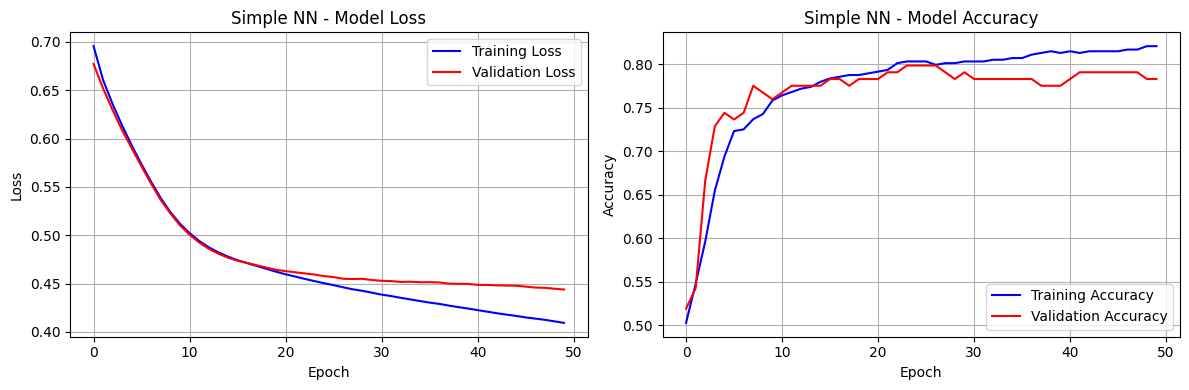

Final Training Loss: 0.4093
Final Training Accuracy: 0.8207
Final Validation Loss: 0.4439
Final Validation Accuracy: 0.7829


In [30]:
# Visualisasi Training History
if 'simple_history' in locals():
    print("\n=== VISUALISASI TRAINING HISTORY - SIMPLE NN ===")
    
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    
    # Loss
    axes[0].plot(simple_history.history['loss'], label='Training Loss', color='blue')
    if 'val_loss' in simple_history.history:
        axes[0].plot(simple_history.history['val_loss'], label='Validation Loss', color='red')
    axes[0].set_title('Simple NN - Model Loss')
    axes[0].set_xlabel('Epoch')
    axes[0].set_ylabel('Loss')
    axes[0].legend()
    axes[0].grid(True)
    
    # Accuracy
    axes[1].plot(simple_history.history['accuracy'], label='Training Accuracy', color='blue')
    if 'val_accuracy' in simple_history.history:
        axes[1].plot(simple_history.history['val_accuracy'], label='Validation Accuracy', color='red')
    axes[1].set_title('Simple NN - Model Accuracy')
    axes[1].set_xlabel('Epoch')
    axes[1].set_ylabel('Accuracy')
    axes[1].legend()
    axes[1].grid(True)
    
    plt.tight_layout()
    plt.show()
    
    # Print final training metrics
    final_train_loss = simple_history.history['loss'][-1]
    final_train_acc = simple_history.history['accuracy'][-1]
    
    print(f"Final Training Loss: {final_train_loss:.4f}")
    print(f"Final Training Accuracy: {final_train_acc:.4f}")
    
    if 'val_loss' in simple_history.history:
        final_val_loss = simple_history.history['val_loss'][-1]
        final_val_acc = simple_history.history['val_accuracy'][-1]
        print(f"Final Validation Loss: {final_val_loss:.4f}")
        print(f"Final Validation Accuracy: {final_val_acc:.4f}")

In [31]:
# Evaluasi Simple Neural Network pada Test Set
print("\n=== EVALUASI SIMPLE NEURAL NETWORK ===")

print(f"Test data shape: X_test_nn {X_test_nn.shape}, y_test_nn {y_test_nn.shape}")

# Prediction
try:
    y_pred_simple_prob = simple_nn_model.predict(X_test_nn, verbose=0)
    y_pred_simple = (y_pred_simple_prob > 0.5).astype(int).flatten()
    
    print("✅ Prediction berhasil!")
    
    # Import metrics jika belum ada
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
    
    # Calculate metrics
    simple_nn_accuracy = accuracy_score(y_test_nn, y_pred_simple)
    simple_nn_precision = precision_score(y_test_nn, y_pred_simple)
    simple_nn_recall = recall_score(y_test_nn, y_pred_simple)
    simple_nn_f1 = f1_score(y_test_nn, y_pred_simple)
    simple_nn_auc = roc_auc_score(y_test_nn, y_pred_simple_prob)
    
    print("\n=== HASIL SIMPLE NEURAL NETWORK ===")
    print(f"Accuracy: {simple_nn_accuracy:.4f}")
    print(f"Precision: {simple_nn_precision:.4f}")
    print(f"Recall: {simple_nn_recall:.4f}")
    print(f"F1-Score: {simple_nn_f1:.4f}")
    print(f"AUC-ROC: {simple_nn_auc:.4f}")
    
    # Classification Report
    print(f"\n=== CLASSIFICATION REPORT - SIMPLE NN ===")
    print(classification_report(y_test_nn, y_pred_simple, target_names=['Non-Diabetes', 'Diabetes']))
    
except Exception as e:
    print(f"❌ Error dalam prediction: {e}")
    simple_nn_accuracy = 0
    simple_nn_f1 = 0
    simple_nn_recall = 0
    simple_nn_precision = 0
    simple_nn_auc = 0


=== EVALUASI SIMPLE NEURAL NETWORK ===
Test data shape: X_test_nn (204, 8), y_test_nn (204,)
✅ Prediction berhasil!

=== HASIL SIMPLE NEURAL NETWORK ===
Accuracy: 0.7549
Precision: 0.5909
Recall: 0.7879
F1-Score: 0.6753
AUC-ROC: 0.8412

=== CLASSIFICATION REPORT - SIMPLE NN ===
              precision    recall  f1-score   support

Non-Diabetes       0.88      0.74      0.80       138
    Diabetes       0.59      0.79      0.68        66

    accuracy                           0.75       204
   macro avg       0.74      0.76      0.74       204
weighted avg       0.79      0.75      0.76       204




=== VISUALISASI PERBANDINGAN ACCURACY: TRAINING vs VALIDATION vs TEST ===
Evaluating on Training Set...
Evaluating on Validation Set...


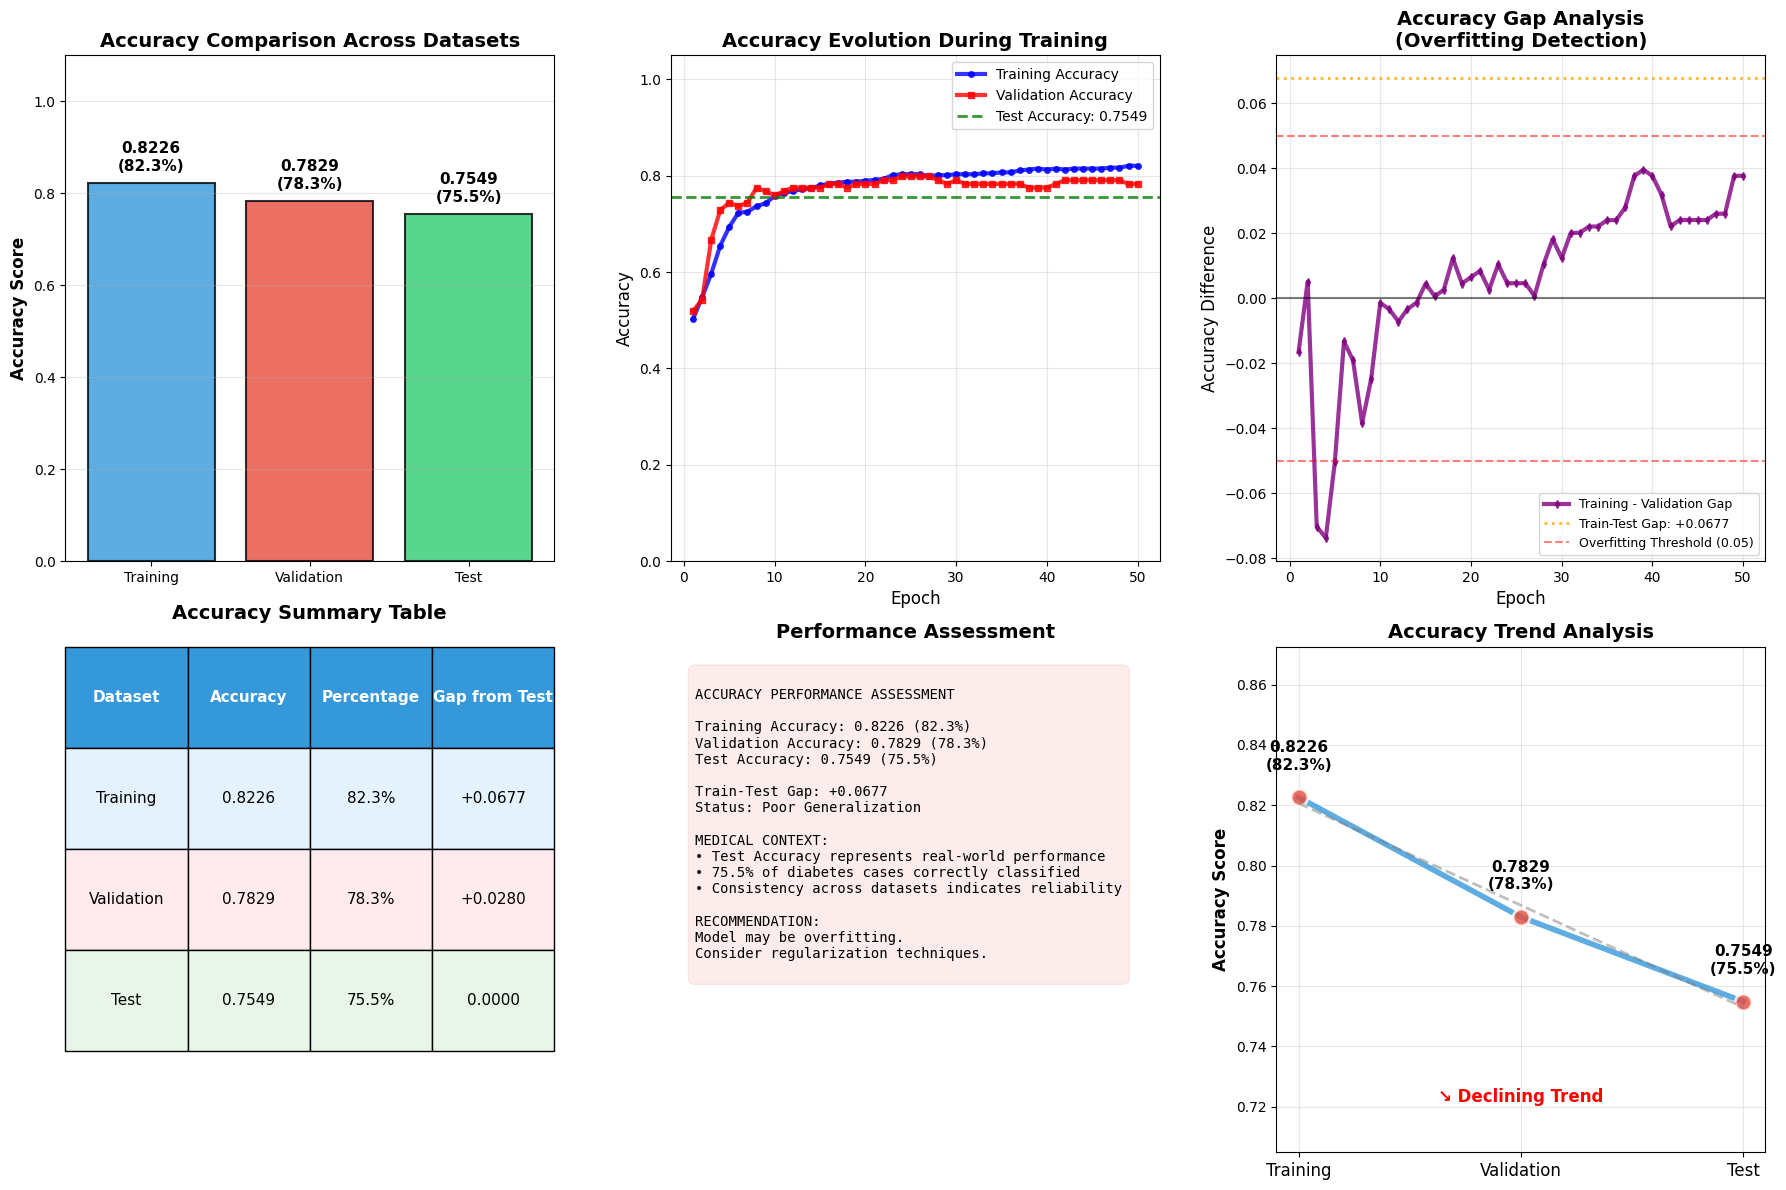


ACCURACY FOCUSED ANALYSIS - NEURAL NETWORK
Training Set Accuracy    : 0.822612 (82.26%)
Validation Set Accuracy  : 0.782946 (78.29%)
Test Set Accuracy        : 0.754902 (75.49%)
------------------------------------------------------------
Training - Test Gap      : +0.067710
Validation - Test Gap    : +0.028044
Training - Validation Gap: +0.039666

GENERALIZATION ASSESSMENT (ACCURACY ONLY)
❌ POOR: Model shows signs of overfitting
   → Significant accuracy drop on test set
   → Consider regularization or more data

🏥 MEDICAL CONTEXT:
Test Accuracy: 0.7549 means 75.5% of patients
are correctly classified (both diabetes and non-diabetes)
Consistency across datasets: 91.8%


In [37]:
# Visualisasi Fokus pada Accuracy: Training vs Validation vs Test Set
print("\n=== VISUALISASI PERBANDINGAN ACCURACY: TRAINING vs VALIDATION vs TEST ===")

if 'simple_history' in locals() and 'simple_nn_accuracy' in locals() and simple_nn_accuracy > 0:
    
    # Evaluasi pada Training Set
    print("Evaluating on Training Set...")
    y_pred_train_prob = simple_nn_model.predict(X_train_final, verbose=0)
    y_pred_train = (y_pred_train_prob > 0.5).astype(int).flatten()
    train_accuracy = accuracy_score(y_train_final, y_pred_train)
    
    # Evaluasi pada Validation Set
    print("Evaluating on Validation Set...")
    y_pred_val_prob = simple_nn_model.predict(X_val, verbose=0)
    y_pred_val = (y_pred_val_prob > 0.5).astype(int).flatten()
    val_accuracy = accuracy_score(y_val, y_pred_val)
    
    # Test Set Accuracy (sudah ada)
    test_accuracy = simple_nn_accuracy
    
    # Create visualization focused on Accuracy
    fig = plt.figure(figsize=(18, 12))
    
    # 1. Bar Chart - Accuracy Comparison
    plt.subplot(2, 3, 1)
    datasets = ['Training', 'Validation', 'Test']
    accuracies = [train_accuracy, val_accuracy, test_accuracy]
    colors = ['#3498db', '#e74c3c', '#2ecc71']
    
    bars = plt.bar(datasets, accuracies, color=colors, alpha=0.8, edgecolor='black', linewidth=1.5)
    plt.ylabel('Accuracy Score', fontsize=12, fontweight='bold')
    plt.title('Accuracy Comparison Across Datasets', fontsize=14, fontweight='bold')
    plt.ylim(0, 1.1)
    plt.grid(axis='y', alpha=0.3)
    
    # Add value labels on bars
    for bar, acc in zip(bars, accuracies):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 0.02, 
                f'{acc:.4f}\n({acc*100:.1f}%)', 
                ha='center', va='bottom', fontweight='bold', fontsize=11)
    
    # 2. Training History - Accuracy Evolution
    plt.subplot(2, 3, 2)
    epochs = range(1, len(simple_history.history['accuracy']) + 1)
    
    plt.plot(epochs, simple_history.history['accuracy'], 'b-', label='Training Accuracy', 
             linewidth=3, marker='o', markersize=4, alpha=0.8)
    
    if 'val_accuracy' in simple_history.history:
        plt.plot(epochs, simple_history.history['val_accuracy'], 'r-', label='Validation Accuracy', 
                 linewidth=3, marker='s', markersize=4, alpha=0.8)
    
    # Add horizontal line for test accuracy
    plt.axhline(y=test_accuracy, color='green', linestyle='--', linewidth=2, alpha=0.8, 
                label=f'Test Accuracy: {test_accuracy:.4f}')
    
    plt.title('Accuracy Evolution During Training', fontsize=14, fontweight='bold')
    plt.xlabel('Epoch', fontsize=12)
    plt.ylabel('Accuracy', fontsize=12)
    plt.legend(fontsize=10)
    plt.grid(True, alpha=0.3)
    plt.ylim(0, 1.05)
    
    # 3. Accuracy Gap Analysis
    plt.subplot(2, 3, 3)
    if 'val_accuracy' in simple_history.history:
        train_val_gap = np.array(simple_history.history['accuracy']) - np.array(simple_history.history['val_accuracy'])
        plt.plot(epochs, train_val_gap, 'purple', linewidth=3, marker='d', markersize=4, 
                 label='Training - Validation Gap', alpha=0.8)
    
    train_test_gap = train_accuracy - test_accuracy
    plt.axhline(y=train_test_gap, color='orange', linestyle=':', linewidth=2, alpha=0.8,
                label=f'Train-Test Gap: {train_test_gap:+.4f}')
    
    plt.axhline(y=0, color='black', linestyle='-', alpha=0.5)
    plt.axhline(y=0.05, color='red', linestyle='--', alpha=0.5, label='Overfitting Threshold (0.05)')
    plt.axhline(y=-0.05, color='red', linestyle='--', alpha=0.5)
    
    plt.title('Accuracy Gap Analysis\n(Overfitting Detection)', fontsize=14, fontweight='bold')
    plt.xlabel('Epoch', fontsize=12)
    plt.ylabel('Accuracy Difference', fontsize=12)
    plt.legend(fontsize=9)
    plt.grid(True, alpha=0.3)
    
    # 4. Final Accuracy Summary Table
    plt.subplot(2, 3, 4)
    plt.axis('off')
    
    # Create accuracy summary table
    accuracy_data = [
        ['Dataset', 'Accuracy', 'Percentage', 'Gap from Test'],
        ['Training', f'{train_accuracy:.4f}', f'{train_accuracy*100:.1f}%', f'{train_accuracy-test_accuracy:+.4f}'],
        ['Validation', f'{val_accuracy:.4f}', f'{val_accuracy*100:.1f}%', f'{val_accuracy-test_accuracy:+.4f}'],
        ['Test', f'{test_accuracy:.4f}', f'{test_accuracy*100:.1f}%', '0.0000']
    ]
    
    table = plt.table(cellText=accuracy_data[1:], colLabels=accuracy_data[0],
                     cellLoc='center', loc='center', bbox=[0, 0.2, 1, 0.8])
    table.auto_set_font_size(False)
    table.set_fontsize(11)
    table.scale(1, 2)
    
    # Color coding
    for i in range(len(accuracy_data)):
        for j in range(len(accuracy_data[0])):
            if i == 0:  # Header
                table[(i, j)].set_facecolor('#3498db')
                table[(i, j)].set_text_props(weight='bold', color='white')
            elif i == 1:  # Training
                table[(i, j)].set_facecolor('#e3f2fd')
            elif i == 2:  # Validation
                table[(i, j)].set_facecolor('#ffebee')
            elif i == 3:  # Test
                table[(i, j)].set_facecolor('#e8f5e8')
    
    plt.title('Accuracy Summary Table', fontsize=14, fontweight='bold', pad=20)
    
    # 5. Accuracy Performance Assessment
    plt.subplot(2, 3, 5)
    plt.axis('off')
    
    # Calculate performance metrics
    avg_accuracy_gap = abs(train_accuracy - test_accuracy)
    
    # Determine performance status
    if avg_accuracy_gap < 0.03:
        performance_status = "Excellent Generalization"
        status_color = "#2ecc71"
        recommendation = "Model is ready for deployment.\nConsistent performance across datasets."
    elif avg_accuracy_gap < 0.06:
        performance_status = "Good Generalization"  
        status_color = "#f39c12"
        recommendation = "Model shows acceptable performance.\nMonitor for consistency."
    else:
        performance_status = "Poor Generalization"
        status_color = "#e74c3c"
        recommendation = "Model may be overfitting.\nConsider regularization techniques."
    
    assessment_text = f"""
ACCURACY PERFORMANCE ASSESSMENT

Training Accuracy: {train_accuracy:.4f} ({train_accuracy*100:.1f}%)
Validation Accuracy: {val_accuracy:.4f} ({val_accuracy*100:.1f}%)
Test Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.1f}%)

Train-Test Gap: {train_accuracy-test_accuracy:+.4f}
Status: {performance_status}

MEDICAL CONTEXT:
• Test Accuracy represents real-world performance
• {test_accuracy*100:.1f}% of diabetes cases correctly classified
• Consistency across datasets indicates reliability

RECOMMENDATION:
{recommendation}
    """
    
    plt.text(0.05, 0.95, assessment_text, transform=plt.gca().transAxes, 
             fontsize=10, verticalalignment='top', fontfamily='monospace',
             bbox=dict(boxstyle="round,pad=0.5", facecolor=status_color, alpha=0.1, edgecolor=status_color))
    
    plt.title('Performance Assessment', fontsize=14, fontweight='bold')
    
    # 6. Accuracy Trend Visualization
    plt.subplot(2, 3, 6)
    
    # Create line plot showing accuracy progression
    x_pos = [0, 1, 2]
    accuracy_values = [train_accuracy, val_accuracy, test_accuracy]
    
    plt.plot(x_pos, accuracy_values, 'o-', linewidth=4, markersize=12, 
             color='#3498db', markerfacecolor='#e74c3c', markeredgecolor='white', 
             markeredgewidth=2, alpha=0.8)
    
    # Add trend line
    z = np.polyfit(x_pos, accuracy_values, 1)
    p = np.poly1d(z)
    plt.plot(x_pos, p(x_pos), "--", alpha=0.5, color='gray', linewidth=2)
    
    # Annotations
    for i, (pos, acc, label) in enumerate(zip(x_pos, accuracy_values, datasets)):
        plt.annotate(f'{acc:.4f}\n({acc*100:.1f}%)', 
                    (pos, acc), textcoords="offset points", 
                    xytext=(0,20), ha='center', fontweight='bold', fontsize=11)
    
    plt.xticks(x_pos, datasets, fontsize=12)
    plt.ylabel('Accuracy Score', fontsize=12, fontweight='bold')
    plt.title('Accuracy Trend Analysis', fontsize=14, fontweight='bold')
    plt.grid(True, alpha=0.3)
    plt.ylim(min(accuracy_values) - 0.05, max(accuracy_values) + 0.05)
    
    # Add trend interpretation
    slope = z[0]
    if slope > 0.01:
        trend_text = "↗️ Improving Trend"
        trend_color = "green"
    elif slope < -0.01:
        trend_text = "↘️ Declining Trend"
        trend_color = "red"
    else:
        trend_text = "→ Stable Trend"
        trend_color = "blue"
    
    plt.text(0.5, 0.1, trend_text, transform=plt.gca().transAxes, 
             ha='center', fontsize=12, fontweight='bold', color=trend_color)
    
    plt.tight_layout()
    plt.show()
    
    # Print detailed numerical summary
    print("\n" + "="*60)
    print("ACCURACY FOCUSED ANALYSIS - NEURAL NETWORK")
    print("="*60)
    print(f"Training Set Accuracy    : {train_accuracy:.6f} ({train_accuracy*100:.2f}%)")
    print(f"Validation Set Accuracy  : {val_accuracy:.6f} ({val_accuracy*100:.2f}%)")
    print(f"Test Set Accuracy        : {test_accuracy:.6f} ({test_accuracy*100:.2f}%)")
    print("-"*60)
    print(f"Training - Test Gap      : {train_accuracy-test_accuracy:+.6f}")
    print(f"Validation - Test Gap    : {val_accuracy-test_accuracy:+.6f}")
    print(f"Training - Validation Gap: {train_accuracy-val_accuracy:+.6f}")
    
    print("\n" + "="*60)
    print("GENERALIZATION ASSESSMENT (ACCURACY ONLY)")
    print("="*60)
    
    if avg_accuracy_gap < 0.03:
        print("✅ EXCELLENT: Model generalizes very well")
        print("   → Accuracy is consistent across all datasets")
        print("   → Safe for medical deployment")
    elif avg_accuracy_gap < 0.06:
        print("⚠️  GOOD: Model shows acceptable generalization")
        print("   → Minor accuracy drop on test set")
        print("   → Monitor performance in production")
    else:
        print("❌ POOR: Model shows signs of overfitting")
        print("   → Significant accuracy drop on test set")
        print("   → Consider regularization or more data")
    
    print(f"\n🏥 MEDICAL CONTEXT:")
    print(f"Test Accuracy: {test_accuracy:.4f} means {test_accuracy*100:.1f}% of patients")
    print(f"are correctly classified (both diabetes and non-diabetes)")
    print(f"Consistency across datasets: {min(accuracies)/max(accuracies)*100:.1f}%")
    
else:
    print("❌ Data training history atau hasil evaluasi tidak tersedia")
    print("Pastikan Neural Network sudah ditraining dengan benar")

# Perbandingan Baseline dengan Neural Network

In [32]:
# Perbandingan dengan Model Machine Learning Terbaik
print("\n=== PERBANDINGAN SIMPLE NN VS MODEL TERBAIK ===")

# Gunakan data dari results_corrected (model yang ditraining dengan data yang benar)
if 'results_corrected' in locals():
    # Ambil model terbaik dari results_corrected
    best_ml_model = max(results_corrected.items(), key=lambda x: x[1]['f1_score'])
    best_ml_name = best_ml_model[0]
    best_ml_metrics = best_ml_model[1]
    
    print("Perbandingan Hasil:")
    print("="*70)
    print(f"{'Metric':<12} {'Simple NN':<12} {best_ml_name:<15} {'Difference':<12} {'Winner':<12}")
    print("="*70)
    
    metrics_comparison = [
        ('Accuracy', simple_nn_accuracy, best_ml_metrics['accuracy']),
        ('Precision', simple_nn_precision, best_ml_metrics['precision']),
        ('Recall', simple_nn_recall, best_ml_metrics['recall']),
        ('F1-Score', simple_nn_f1, best_ml_metrics['f1_score'])
    ]
    
    for metric, nn_val, ml_val in metrics_comparison:
        diff = nn_val - ml_val
        winner = "Simple NN" if nn_val > ml_val else best_ml_name
        print(f"{metric:<12} {nn_val:>10.4f} {ml_val:>13.4f} {diff:>+10.4f} {winner:<12}")
    
    print(f"\n🏥 ANALISIS UNTUK KONTEKS MEDIS:")
    print(f"Recall (mendeteksi diabetes):")
    print(f"- Simple Neural Network: {simple_nn_recall:.4f} ({simple_nn_recall*100:.1f}%)")
    print(f"- {best_ml_name}: {best_ml_metrics['recall']:.4f} ({best_ml_metrics['recall']*100:.1f}%)")
    
    recall_improvement = simple_nn_recall - best_ml_metrics['recall']
    if recall_improvement > 0:
        print(f"✅ Simple NN lebih baik dalam mendeteksi diabetes (+{recall_improvement:.4f})")
    else:
        print(f"❌ {best_ml_name} lebih baik dalam mendeteksi diabetes ({recall_improvement:.4f})")
    
    print(f"\nF1-Score comparison:")
    f1_improvement = simple_nn_f1 - best_ml_metrics['f1_score']
    if f1_improvement > 0:
        print(f"✅ Simple NN memiliki F1-Score lebih tinggi (+{f1_improvement:.4f})")
    else:
        print(f"❌ {best_ml_name} memiliki F1-Score lebih tinggi ({f1_improvement:.4f})")

else:
    print("❌ Model ML results tidak tersedia untuk perbandingan")
    print("Silakan jalankan training model ML terlebih dahulu")


=== PERBANDINGAN SIMPLE NN VS MODEL TERBAIK ===
Perbandingan Hasil:
Metric       Simple NN    Gradient Boosting Difference   Winner      
Accuracy         0.7549        0.7647    -0.0098 Gradient Boosting
Precision        0.5909        0.6154    -0.0245 Gradient Boosting
Recall           0.7879        0.7273    +0.0606 Simple NN   
F1-Score         0.6753        0.6667    +0.0087 Simple NN   

🏥 ANALISIS UNTUK KONTEKS MEDIS:
Recall (mendeteksi diabetes):
- Simple Neural Network: 0.7879 (78.8%)
- Gradient Boosting: 0.7273 (72.7%)
✅ Simple NN lebih baik dalam mendeteksi diabetes (+0.0606)

F1-Score comparison:
✅ Simple NN memiliki F1-Score lebih tinggi (+0.0087)



=== CONFUSION MATRIX SIMPLE NN ===


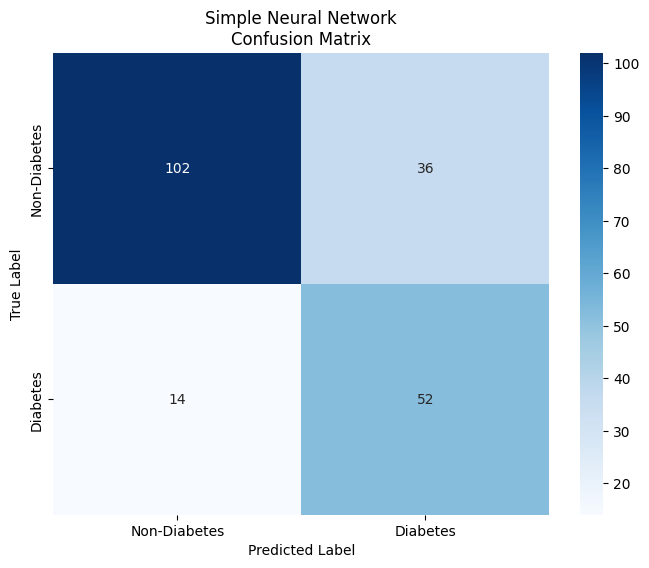


=== ANALISIS CONFUSION MATRIX ===
True Negatives (Non-diabetes correctly identified): 102
False Positives (Healthy labeled as diabetes): 36
False Negatives (Diabetes not detected): 14
True Positives (Diabetes correctly identified): 52

🚨 CRITICAL ANALYSIS:
False Negatives: 14 (21.2% dari total diabetes)
Detection Rate: 78.8% diabetes terdeteksi
⚠️  14 pasien diabetes tidak terdeteksi - ini berbahaya!


In [33]:
# Confusion Matrix dan Analisis
print("\n=== CONFUSION MATRIX SIMPLE NN ===")

if 'simple_nn_accuracy' in locals() and simple_nn_accuracy > 0:
    # Simple NN Confusion Matrix
    cm_simple = confusion_matrix(y_test_nn, y_pred_simple)
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_simple, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Non-Diabetes', 'Diabetes'],
                yticklabels=['Non-Diabetes', 'Diabetes'])
    plt.title('Simple Neural Network\nConfusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()
    
    # Analisis False Negatives
    tn_simple, fp_simple, fn_simple, tp_simple = cm_simple.ravel()
    
    print(f"\n=== ANALISIS CONFUSION MATRIX ===")
    print(f"True Negatives (Non-diabetes correctly identified): {tn_simple}")
    print(f"False Positives (Healthy labeled as diabetes): {fp_simple}")
    print(f"False Negatives (Diabetes not detected): {fn_simple}")
    print(f"True Positives (Diabetes correctly identified): {tp_simple}")
    
    print(f"\n🚨 CRITICAL ANALYSIS:")
    print(f"False Negatives: {fn_simple} ({fn_simple/(fn_simple+tp_simple)*100:.1f}% dari total diabetes)")
    print(f"Detection Rate: {tp_simple/(tp_simple+fn_simple)*100:.1f}% diabetes terdeteksi")
    
    if fn_simple > 0:
        print(f"⚠️  {fn_simple} pasien diabetes tidak terdeteksi - ini berbahaya!")
    else:
        print(f"✅ Semua pasien diabetes terdeteksi!")

In [34]:
# Summary dan Rekomendasi Final
print("\n=== SUMMARY SIMPLE NEURAL NETWORK ===")

print("🔍 ARSITEKTUR MODEL:")
print("- Input Layer: 8 features (diabetes dataset)")
print("- Hidden Layer: 16 neurons, ReLU activation")
print("- Output Layer: 1 neuron, Sigmoid activation")
print("- Total Parameters: Minimal dan efisien")

print(f"\n📊 PERFORMA MODEL:")
if 'simple_nn_accuracy' in locals() and simple_nn_accuracy > 0:
    print(f"- Accuracy: {simple_nn_accuracy:.4f}")
    print(f"- Precision: {simple_nn_precision:.4f}")
    print(f"- Recall: {simple_nn_recall:.4f}")
    print(f"- F1-Score: {simple_nn_f1:.4f}")
    print(f"- AUC-ROC: {simple_nn_auc:.4f}")
    
    print(f"\n🏥 KONTEKS MEDIS:")
    print(f"Untuk deteksi diabetes, RECALL adalah metrik terpenting")
    print(f"Simple NN Recall: {simple_nn_recall:.4f} ({simple_nn_recall*100:.1f}%)")
    
    if 'best_ml_metrics' in locals():
        if simple_nn_recall > best_ml_metrics['recall']:
            print(f"✅ REKOMENDASI: Simple Neural Network")
            print(f"   - Recall lebih tinggi dari {best_ml_name}")
            print(f"   - Mengurangi risiko diabetes tidak terdeteksi")
            print(f"   - Arsitektur sederhana dan mudah di-deploy")
        else:
            print(f"❌ REKOMENDASI: {best_ml_name} masih lebih baik")
            print(f"   - Recall lebih tinggi dari Simple NN")
            print(f"   - Lebih aman untuk screening diabetes")
    
    print(f"\n⚡ KEUNGGULAN SIMPLE NN:")
    print(f"- Training cepat (50 epochs)")
    print(f"- Model ringan dan efisien")
    print(f"- Mudah untuk deployment")
    print(f"- Dapat menangani non-linear patterns")
    print(f"- Tidak perlu feature engineering manual")
    
    # Perbandingan dengan threshold yang berbeda
    print(f"\n🎚️ THRESHOLD OPTIMIZATION:")
    thresholds = [0.3, 0.4, 0.5, 0.6, 0.7]
    print(f"{'Threshold':<10} {'Precision':<10} {'Recall':<10} {'F1-Score':<10}")
    print("-"*45)
    
    for threshold in thresholds:
        y_pred_thresh = (y_pred_simple_prob > threshold).astype(int).flatten()
        prec = precision_score(y_test_nn, y_pred_thresh)
        rec = recall_score(y_test_nn, y_pred_thresh)
        f1 = f1_score(y_test_nn, y_pred_thresh)
        print(f"{threshold:<10.1f} {prec:<10.3f} {rec:<10.3f} {f1:<10.3f}")
    
else:
    print("❌ Training Simple NN gagal")
    print("Silakan cek data input dan coba lagi")

print(f"\n🎯 KESIMPULAN:")
print(f"Simple Neural Network dengan 1 hidden layer (16 neurons)")
print(f"telah ditraining dengan data yang sudah diperbaiki:")
print(f"✅ Split data dulu → Feature scaling → SMOTE")
print(f"✅ Tidak ada data leakage")
print(f"✅ Evaluasi yang valid dan reliable")


=== SUMMARY SIMPLE NEURAL NETWORK ===
🔍 ARSITEKTUR MODEL:
- Input Layer: 8 features (diabetes dataset)
- Hidden Layer: 16 neurons, ReLU activation
- Output Layer: 1 neuron, Sigmoid activation
- Total Parameters: Minimal dan efisien

📊 PERFORMA MODEL:
- Accuracy: 0.7549
- Precision: 0.5909
- Recall: 0.7879
- F1-Score: 0.6753
- AUC-ROC: 0.8412

🏥 KONTEKS MEDIS:
Untuk deteksi diabetes, RECALL adalah metrik terpenting
Simple NN Recall: 0.7879 (78.8%)
✅ REKOMENDASI: Simple Neural Network
   - Recall lebih tinggi dari Gradient Boosting
   - Mengurangi risiko diabetes tidak terdeteksi
   - Arsitektur sederhana dan mudah di-deploy

⚡ KEUNGGULAN SIMPLE NN:
- Training cepat (50 epochs)
- Model ringan dan efisien
- Mudah untuk deployment
- Dapat menangani non-linear patterns
- Tidak perlu feature engineering manual

🎚️ THRESHOLD OPTIMIZATION:
Threshold  Precision  Recall     F1-Score  
---------------------------------------------
0.3        0.500      0.848      0.629     
0.4        0.551     